<a href="https://colab.research.google.com/github/danpele/NEURAL_BIZ/blob/main/From_Linear_Regression_to_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regression with Neural Networks – From Linear Regression to Deep Learning**


In [ ]:
# ------------------------------------------
# 📦 Installation (Only for Google Colab)
# ------------------------------------------
!pip install -q pandas matplotlib seaborn scikit-learn tensorflow pydot

# Required for model visualization
!apt-get -qq install graphviz

# ------------------------------------------
# 🔧 Import Libraries
# ------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn modules for regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# TensorFlow for ANN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

# Plot settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

# Reproducibility
np.random.seed(42)
tf.random.set_seed(42)


# 🧠 Regression for Business: From Linear Regression to Deep Neural Networks

## 📊 Business Case: California Housing Price Prediction
The goal is to predict **house prices** in California based on features like location, median income, number of rooms, and more. Using historical housing data, our goal is to build a **predictive model** to estimate the **price of a house** for each district.

---
## 🧮 Problem Type: Regression
We are solving a **supervised learning** problem with continuous output:
$$
y_i \in \mathbb{R}, \quad \hat{y}_i \in \mathbb{R}
$$
Where:
- $y_i$ represents the **true price** of the house
- $\hat{y}_i$ represents the **predicted price** of the house

---
## 🧱 Modeling Strategy
We will build and compare the following models:

| Step | Model | Description |

|------|--------------------------|-------------|

| 1️⃣ | Linear Regression | Simple linear model for price prediction based on features |

| 2️⃣ | Basic Neural Network | One hidden layer to capture non-linear relationships |

| 3️⃣ | Deep Neural Network | Multiple layers for deeper representations and more complex patterns |

---
## 🎯 Learning Objectives
By completing this notebook, you will:
✅ Understand how to formulate a regression task for predicting house prices
✅ Learn how linear regression compares to neural networks for price prediction
✅ Implement and train models in `scikit-learn` and `TensorFlow/Keras`
✅ Evaluate models using Mean Squared Error (MSE) and R² score
✅ Analyze model performance in a real-world business context

---
## 📦 Dataset
- **Source**: California Housing Prices dataset (from the UCI Machine Learning Repository)
- **Target**: `Median House Value` (continuous variable)
- **Features**: Location (longitude, latitude), housing median age, total rooms, total bedrooms, population, households, median income, and ocean proximity

1. longitude: A measure of how far west a house is; a higher value is farther west

2. latitude: A measure of how far north a house is; a higher value is farther north

3. housingMedianAge: Median age of a house within a block; a lower number is a newer building

4. totalRooms: Total number of rooms within a block

5. totalBedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

10. oceanProximity: Location of the house w.r.t ocean/sea

- **Challenge**: Data preprocessing and feature scaling required, plus comparison between linear and neural network models

Let's begin by loading and exploring the dataset.


In [ ]:
# 📥 Download the California Housing Prices dataset
!wget https://raw.githubusercontent.com/sonarsushant/California-House-Price-Prediction/master/housing.csv -q

# 📥 Load the California Housing dataset
df = pd.read_csv('housing.csv')

# 🧾 Inspect the first few rows
print("📌 First five rows of the dataset:")
display(df.head())

# 📏 Dataset shape
print(f"\n✅ Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# 📊 Data types
print("\n🔍 Data types of each column:")
print(df.dtypes)

# 🔎 Missing values
print("\n❗ Missing values per column:")
print(df.isnull().sum())

# 📊 Class distribution (for regression tasks, you can look at the price distribution)
print("\n📊 Price distribution:")
print(df['median_house_value'].describe())

# 🧠 Interpretation
print(
"""
🧠 Notes:
- The dataset contains housing data from California districts.
- The target variable is 'median_house_value', which represents the median price of houses in a district.
- Features include location, number of rooms, median income, and more.
- The dataset is relatively clean with no missing values detected, making it ready for modeling.
- As the target is continuous (house prices), we will treat this as a regression task.
"""
)


📌 First five rows of the dataset:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY



✅ Dataset contains 20640 rows and 10 columns.

🔍 Data types of each column:
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

❗ Missing values per column:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

📊 Price distribution:
count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

🧠 Notes:
- The dataset contains housing data from Califor

🧮 House Price Distribution:


,median_house_value
count,20640.000000
mean,206855.816909
std,115395.615874
min,14999.000000
25%,119600.000000
50%,179700.000000
75%,264725.000000
max,500001.000000


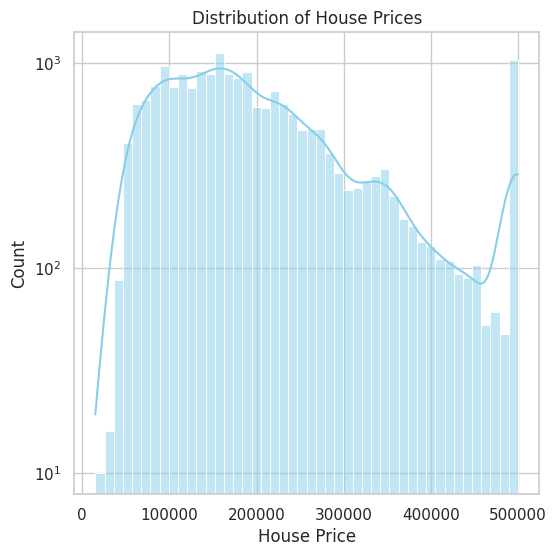

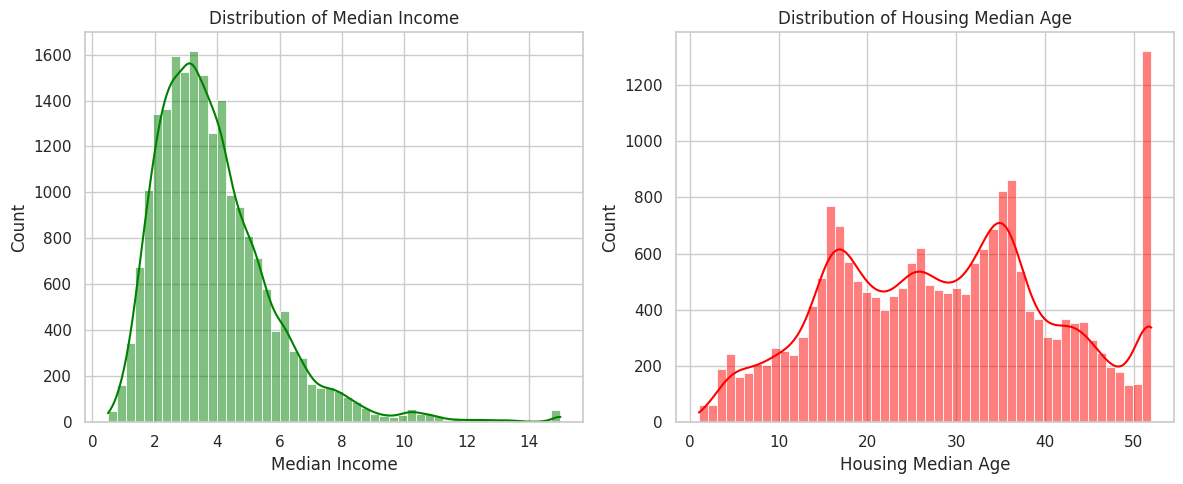

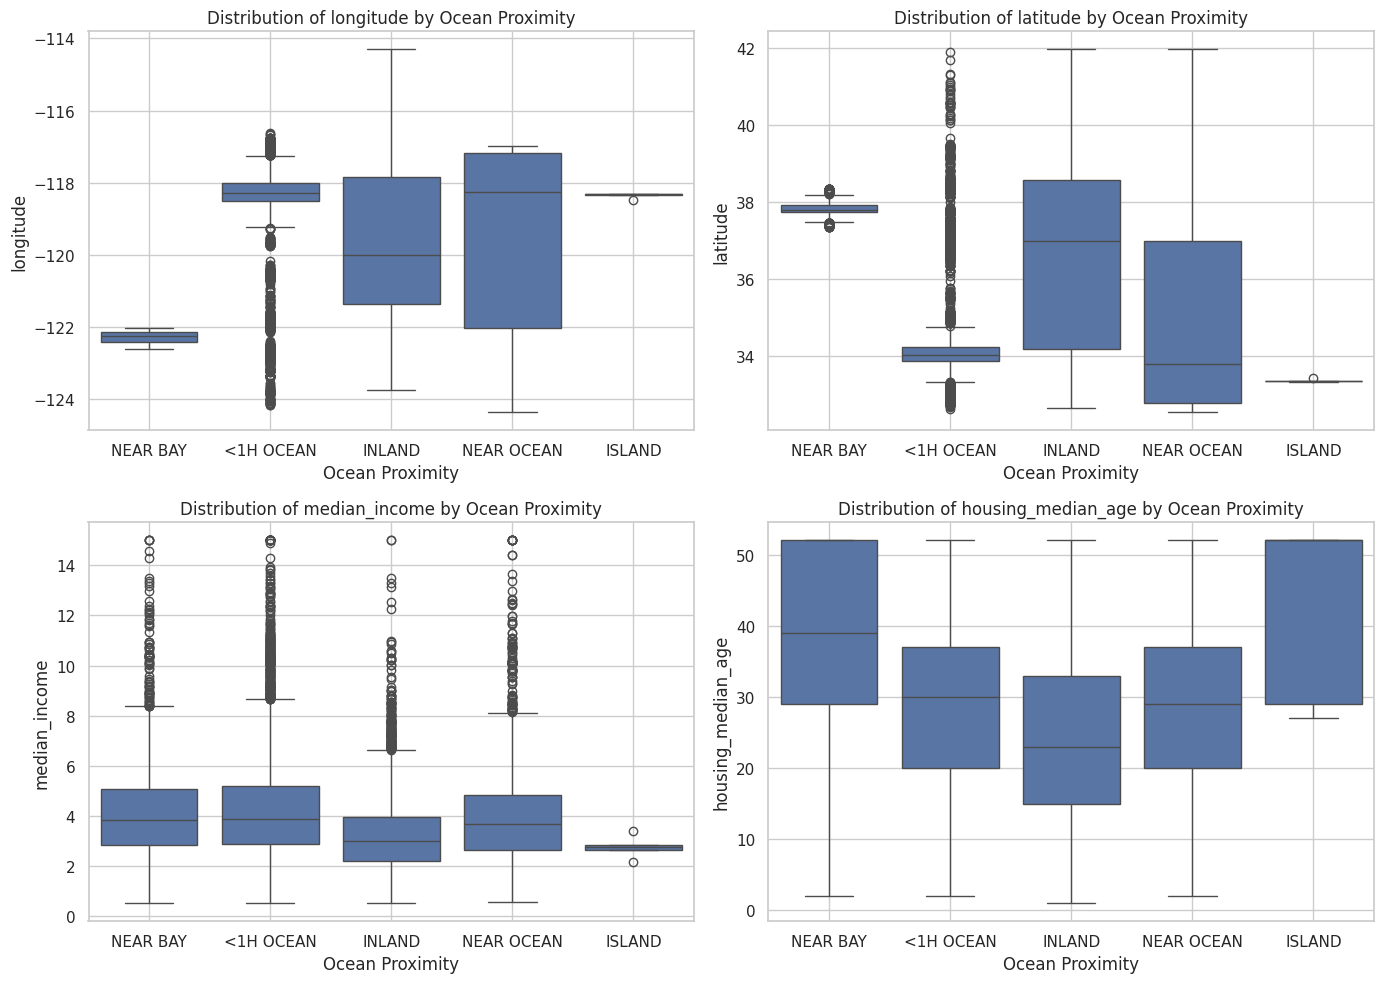

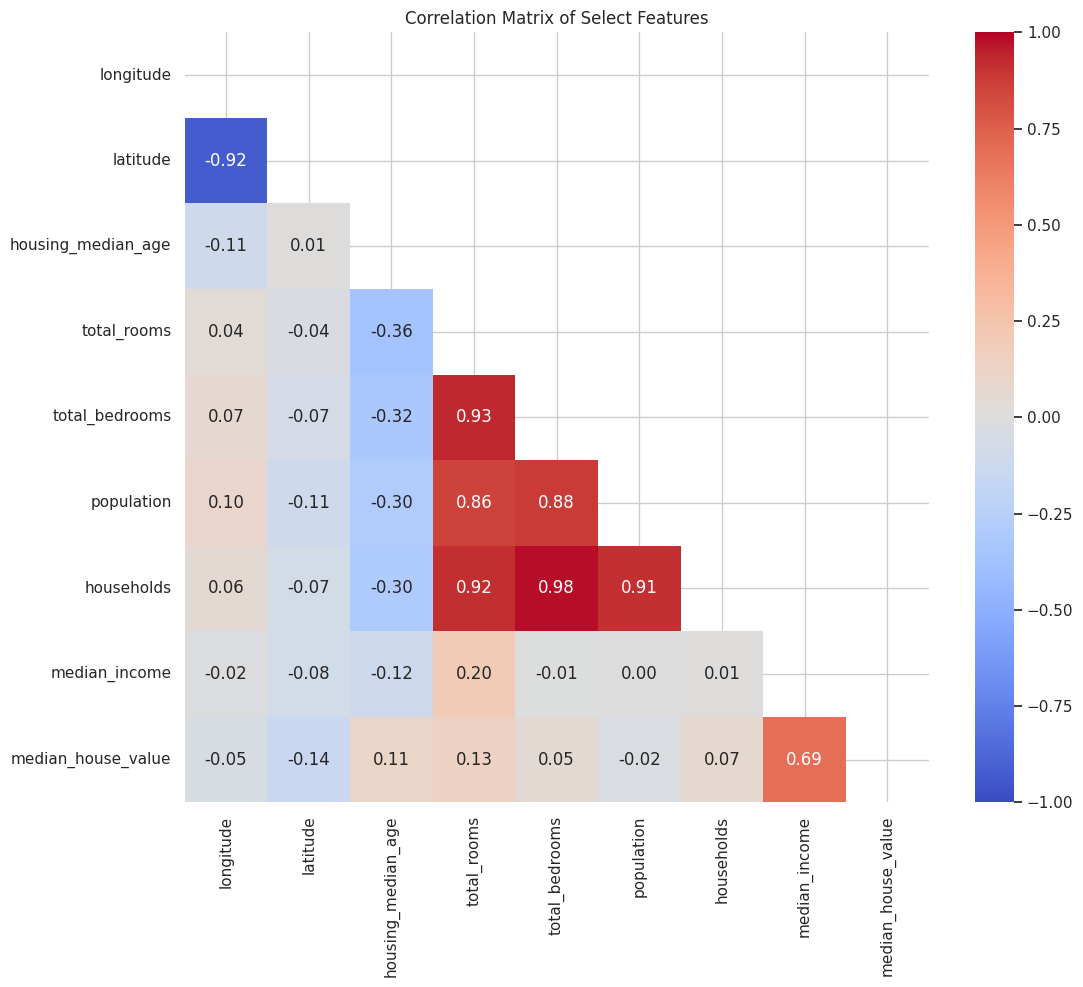

<ipython-input-30-21f0a4389466>:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=important_corrs.values, y=important_corrs.index, palette=colors)
<ipython-input-30-21f0a4389466>:96: UserWarning: The palette list has more values (16) than needed (8), which may not be intended.
  sns.barplot(x=important_corrs.values, y=important_corrs.index, palette=colors)


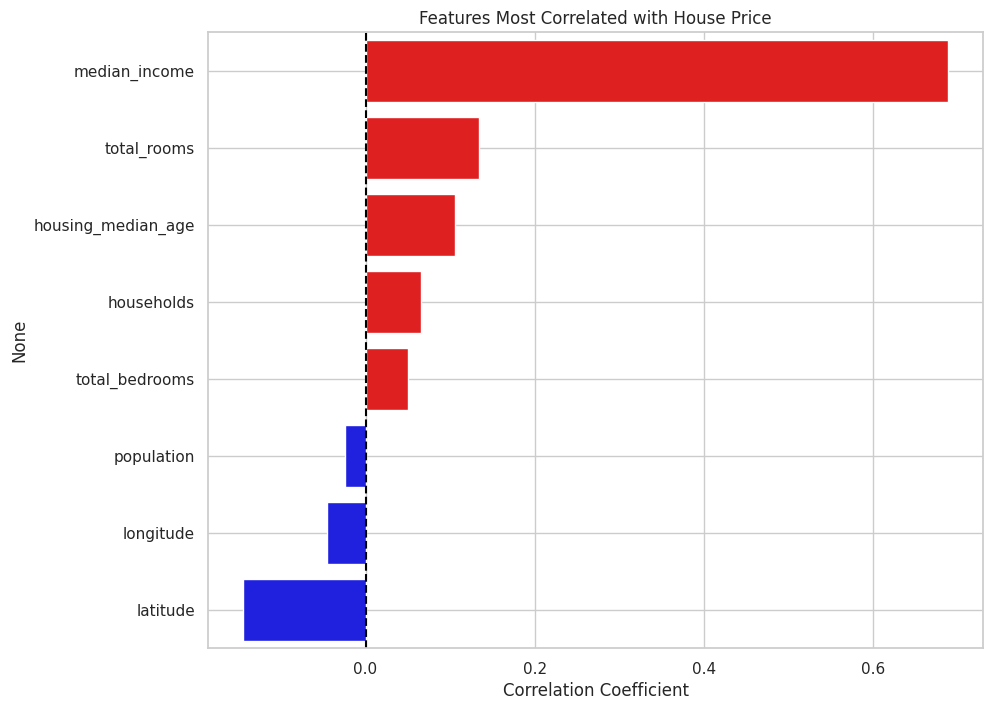

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ------------------------------------------
# 📊 PRICE DISTRIBUTION
# ------------------------------------------
# Inspect the distribution of house prices
price_distribution = df['median_house_value'].describe()
print("🧮 House Price Distribution:")
display(price_distribution)

# Plot house price distribution (log scale to handle skewness)
plt.figure(figsize=(6, 6))
sns.histplot(df['median_house_value'], kde=True, color='skyblue')
plt.title("Distribution of House Prices")
plt.xlabel("House Price")
plt.ylabel("Count")
plt.yscale('log')  # Log scale for better visualization of skewed data
plt.grid(True)
plt.show()

# ------------------------------------------
# 📈 NUMERICAL FEATURES ANALYSIS
# ------------------------------------------
# Plot distribution of some numerical features (e.g., 'Median Income' and 'Household Size')
plt.figure(figsize=(12, 5))

# Plot distribution of median income
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='median_income', kde=True, color='green', bins=50)
plt.title("Distribution of Median Income")
plt.xlabel("Median Income")
plt.ylabel("Count")
plt.grid(True)

# Plot distribution of house age
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='housing_median_age', kde=True, color='red', bins=50)
plt.title("Distribution of Housing Median Age")
plt.xlabel("Housing Median Age")
plt.ylabel("Count")
plt.grid(True)

plt.tight_layout()
plt.show()

# ------------------------------------------
# 📊 FEATURE DISTRIBUTIONS FOR REGRESSION
# ------------------------------------------
# Select a subset of features for boxplot analysis
sample_features = ['longitude', 'latitude', 'median_income', 'housing_median_age']
plt.figure(figsize=(14, 10))

for i, feature in enumerate(sample_features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='ocean_proximity', y=feature, data=df)  # 'ocean_proximity' is categorical
    plt.title(f"Distribution of {feature} by Ocean Proximity")
    plt.xlabel("Ocean Proximity")
    plt.grid(True)

plt.tight_layout()
plt.show()

# ------------------------------------------
# 🔗 CORRELATION MATRIX FOR TOP FEATURES
# ------------------------------------------
# Select only numerical columns for correlation calculation
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Plot correlation matrix for numerical features
plt.figure(figsize=(12, 10))
# Calculate correlation only for numerical features
corr_matrix = df[numerical_columns].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm',
            vmin=-1, vmax=1, center=0, fmt='.2f')
plt.title("Correlation Matrix of Select Features")
plt.show()

# ------------------------------------------
# 📈 FEATURES MOST CORRELATED WITH HOUSE PRICE
# ------------------------------------------
plt.figure(figsize=(10, 8))
# Calculate correlation with 'median_house_value' for numerical features
corr_with_price = df[numerical_columns].corr()['median_house_value'].sort_values(ascending=False)
corr_with_price = corr_with_price[corr_with_price.index != 'median_house_value']  # Remove self-correlation
top_corr = corr_with_price.head(10)
bottom_corr = corr_with_price.tail(10)

# Combine top positive and negative correlations
important_corrs = pd.concat([top_corr, bottom_corr])
colors = ['red' if x > 0 else 'blue' for x in important_corrs.values]

sns.barplot(x=important_corrs.values, y=important_corrs.index, palette=colors)
plt.title("Features Most Correlated with House Price")
plt.xlabel("Correlation Coefficient")
plt.grid(True)
plt.axvline(x=0, color='black', linestyle='--')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ------------------------------------------
# 🧹 Data Preprocessing
# ------------------------------------------
# Scale the 'median_house_value' and other numerical features
from sklearn.preprocessing import StandardScaler

# Create a copy of dataframe for preprocessing
df_processed = df.copy()

# Extract and scale 'median_house_value' and other numerical features separately
price_scaler = StandardScaler()
df_processed['median_house_value_scaled'] = price_scaler.fit_transform(df_processed[['median_house_value']])

# Features like 'median_income', 'housing_median_age' can also be standardized
income_scaler = StandardScaler()
df_processed['median_income_scaled'] = income_scaler.fit_transform(df_processed[['median_income']])

# ------------------------------------------
# 📊 Mean comparison: Ocean Proximity vs House Prices
# ------------------------------------------
print("🔍 Average values for key features by Ocean Proximity:\n")
numeric_summary = df.groupby('ocean_proximity')[['median_house_value', 'median_income', 'housing_median_age', 'total_rooms', 'total_bedrooms']].mean().round(4)
display(numeric_summary)

# ------------------------------------------
# 📊 Statistical Summary of Ocean Proximity vs House Price
# ------------------------------------------
# Create a function to generate statistical summaries for house prices
def get_stats_by_group(df, feature):
    stats = df.groupby('ocean_proximity')[feature].agg(['mean', 'median', 'std', 'min', 'max']).round(4)
    return stats

# Generate statistics for 'median_house_value'
house_price_stats = get_stats_by_group(df, 'median_house_value')
print("\n📊 House Price Statistics by Ocean Proximity:\n")
display(house_price_stats)

# ------------------------------------------
# 📈 House Price Percentiles by Ocean Proximity
# ------------------------------------------
print("\n📊 House Price Percentiles by Ocean Proximity:\n")
percentiles = [0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
percentile_stats = df.groupby('ocean_proximity')['median_house_value'].quantile(percentiles).unstack().round(2)
display(percentile_stats)

# ------------------------------------------
# 📈 Feature Importance Analysis
# ------------------------------------------
# Exclude non-numeric columns (e.g., ocean_proximity) for correlation calculation
numeric_df = df.select_dtypes(include=[np.number])

# Calculate correlation with house price
correlations = numeric_df.corr()['median_house_value'].sort_values(key=lambda x: abs(x), ascending=False)
top_features = correlations.head(11).index.tolist()[1:]  # Exclude 'median_house_value' itself

print("\n📌 Top features correlated with House Price (absolute value):\n")
display(correlations.head(11))

# ------------------------------------------
# 📊 Feature Distributions: Ocean Proximity vs House Prices
# ------------------------------------------
# Create a dataframe with statistical differences
feature_stats = pd.DataFrame(index=df.columns[1:-1])  # Skip 'ocean_proximity' and 'median_house_value'
feature_stats['Ocean_Mean'] = df[df['ocean_proximity'] == 'Near Ocean'].mean()
feature_stats['Inland_Mean'] = df[df['ocean_proximity'] == 'Inland'].mean()
feature_stats['Mean_Diff'] = abs(feature_stats['Ocean_Mean'] - feature_stats['Inland_Mean'])
feature_stats['Mean_Diff_Pct'] = (feature_stats['Mean_Diff'] / feature_stats['Ocean_Mean'].abs()) * 100

# Sort by absolute percentage difference
feature_stats = feature_stats.sort_values('Mean_Diff_Pct', ascending=False)

print("\n📊 Features with Largest Percentage Difference between Ocean Proximity:\n")
display(feature_stats.head(10))


🔍 Average values for key features by Ocean Proximity:



,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms
ocean_proximity,,,,,
<1H OCEAN,240084.2855,4.2307,29.2792,2628.3436,546.5392
INLAND,124805.3920,3.2090,24.2719,2717.7428,533.8816
ISLAND,380440.0000,2.7444,42.4000,1574.6000,420.4000
NEAR BAY,259212.3118,4.1729,37.7301,2493.5895,514.1828
NEAR OCEAN,249433.9774,4.0058,29.3473,2583.7009,538.6157



📊 House Price Statistics by Ocean Proximity:



,mean,median,std,min,max
ocean_proximity,,,,,
<1H OCEAN,240084.2855,214850.0,106124.2922,17500.0,500001.0
INLAND,124805.3920,108500.0,70007.9085,14999.0,500001.0
ISLAND,380440.0000,414700.0,80559.5618,287500.0,450000.0
NEAR BAY,259212.3118,233800.0,122818.5371,22500.0,500001.0
NEAR OCEAN,249433.9774,229450.0,122477.1459,22500.0,500001.0



📊 House Price Percentiles by Ocean Proximity:



,0.10,0.25,0.50,0.75,0.90,0.95,0.99
ocean_proximity,,,,,,,
<1H OCEAN,130150.0,164100.0,214850.0,289100.0,404900.0,500001.0,500001.0
INLAND,60200.0,77500.0,108500.0,148950.0,208300.0,257600.0,406250.0
ISLAND,292500.0,300000.0,414700.0,450000.0,450000.0,450000.0,450000.0
NEAR BAY,112500.0,162500.0,233800.0,345700.0,469460.0,500001.0,500001.0
NEAR OCEAN,107600.0,150000.0,229450.0,322750.0,457880.0,500001.0,500001.0



📌 Top features correlated with House Price (absolute value):



,median_house_value
median_house_value,1.000000
median_income,0.688075
latitude,-0.144160
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
longitude,-0.045967
population,-0.024650



📊 Features with Largest Percentage Difference between Ocean Proximity:



,Ocean_Mean,Inland_Mean,Mean_Diff,Mean_Diff_Pct
latitude,NaN,NaN,NaN,NaN
housing_median_age,NaN,NaN,NaN,NaN
total_rooms,NaN,NaN,NaN,NaN
total_bedrooms,NaN,NaN,NaN,NaN
population,NaN,NaN,NaN,NaN
households,NaN,NaN,NaN,NaN
median_income,NaN,NaN,NaN,NaN
median_house_value,NaN,NaN,NaN,NaN


# 🧮 Feature Standardization & Train-Test Split

## 📏 Standardization of Features

### ❓ Why Standardize?

Many machine learning models — especially those based on **dot products** or **gradient descent** (like linear regression and neural networks) — are sensitive to the **scale of input features**.

Features with larger numerical ranges can:
- Dominate the learning process
- Slow down convergence
- Cause unstable gradients during training

To resolve this, we apply **z-score standardization**:

$$
z_j = \frac{x_j - \mu_j}{\sigma_j}
$$

Where:
- $x_j$ is the original value of feature $j$
- $\mu_j$ is the **mean** of feature $j$ (from the training set only)
- $\sigma_j$ is the **standard deviation** of feature $j$

This transforms the feature to have:
- Mean ≈ 0
- Standard deviation = 1

---

## ✂️ Train-Test Split

To evaluate model performance fairly, we split our dataset into:

- **Training set**: Used to train the model
- **Test set**: Held-out data to assess generalization

We typically use an 80/20 or 70/30 split.

### Key Principle: No Information Leakage

Standardization and preprocessing must use **only training data statistics**. Never use test data to compute scaling parameters. That's why we apply:

1. `scaler.fit(X_train)` — compute mean and std from the training data  
2. `scaler.transform(X_train)` and `scaler.transform(X_test)` — apply to both sets

---



In [ ]:
# 🕵️ California Housing Price Prediction - Data Preprocessing

# 1️⃣ Initial Data Inspection
print("🔍 Dataset Information:")
print(df.info())

# 2️⃣ Check for Missing Values
print("\n🕳️ Missing Values:")
print(df.isnull().sum())

# 3️⃣ Basic Statistical Summary of Features
print("\n📊 Feature Statistics:")
print(df.describe())

# 4️⃣ Preprocessing Steps
# Separate features and target
X = df.drop('median_house_value', axis=1)  # Target variable: 'median_house_value'
y = df['median_house_value']

# 5️⃣ Handle Potential Outliers and Scale Features
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

# Select only the numerical columns for scaling (exclude categorical 'ocean_proximity')
numerical_columns = X.select_dtypes(include=[np.number]).columns  # Select numerical columns only

# Use RobustScaler to handle potential outliers (good for regression tasks with outliers)
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X[numerical_columns])  # Apply scaling only on numerical columns

# Replace the original numerical columns with the scaled ones
X[numerical_columns] = X_scaled

# 6️⃣ Train-Test Split
# We use a 80/20 split to ensure we have sufficient data for model evaluation
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    shuffle=True  # Important for randomization
)

# 7️⃣ Verify Split Characteristics
print("\n🔢 Dataset Split:")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# 🔟 Additional Preprocessing Notes:
# - Time column is not present in this dataset.
# - No need for one-hot encoding since features are already numerical.
# - RobustScaler used to minimize the impact of outliers in numerical features.
# - Standard train-test split (80/20) applied, no need for stratified splitting as we are working with regression.


🔍 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None

🕳️ Missing Values:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income        

# 🕵️ Linear Regression for House Price Prediction

## 🧠 What is Linear Regression in House Price Prediction?
Linear regression is a **linear model** used to predict the **price of a house** based on one or more features such as size, number of rooms, and location. It works by fitting a straight line (or hyperplane in multiple dimensions) to the data points to predict the target variable, which in this case is the house price.

---
## 🔢 Model Equation for House Price Prediction
The model computes a **linear combination of house features**:
$$
y = \mathbf{w}^\top \mathbf{x} + b
$$
Where:
- $\mathbf{x}$ represents the features of the house (e.g., size, number of rooms, etc.)
- $\mathbf{w}$ are the learned weights (coefficients for each feature)
- $b$ is the bias term (intercept)

The model predicts the house price ($y$) as a weighted sum of the features.

---
## 📉 Loss Function: Mean Squared Error (MSE)
The **Mean Squared Error (MSE)** is commonly used as the loss function in linear regression:
$$
\mathcal{L}(y, \hat{y}) = (y - \hat{y})^2
$$
For a dataset of $N$ houses, we minimize the **average MSE**:
$$
J(\mathbf{w}, b) = \frac{1}{N} \sum_{i=1}^{N} (y^{(i)} - \hat{y}^{(i)})^2
$$
Where:
- $y^{(i)}$ is the true house price
- $\hat{y}^{(i)}$ is the predicted house price

---
## 🎯 Optimization: Learning the Weights for House Price Prediction
The goal is to find the **optimal weights** that minimize the loss function (MSE):
$$
J(\mathbf{w}, b) = \frac{1}{N} \sum_{i=1}^{N} (y^{(i)} - (\mathbf{w}^\top \mathbf{x}^{(i)} + b))^2
$$
Where:
- $\hat{y}^{(i)} = \mathbf{w}^\top \mathbf{x}^{(i)} + b$ is the predicted house price for the $i$-th house

---
## 📉 Gradient Descent for House Price Prediction
We use **gradient descent** to minimize the loss by iteratively updating the weights:
### 💡 Gradient Calculations
**Gradient w.r.t. weights:**
$$
\frac{\partial J}{\partial \mathbf{w}} = -\frac{2}{N} \sum_{i=1}^{N} (y^{(i)} - \hat{y}^{(i)}) \cdot \mathbf{x}^{(i)}
$$
**Gradient w.r.t. bias:**
$$
\frac{\partial J}{\partial b} = -\frac{2}{N} \sum_{i=1}^{N} (y^{(i)} - \hat{y}^{(i)})
$$

---
## 🔁 Parameter Update Rule
At each iteration $t$, we update the weights and bias using the gradients calculated:
$$
\mathbf{w}^{(t+1)} = \mathbf{w}^{(t)} - \eta \cdot \frac{1}{N} \sum_{i=1}^{N} (y^{(i)} - \hat{y}^{(i)}) \cdot \mathbf{x}^{(i)}
$$
$$
b^{(t+1)} = b^{(t)} - \eta \cdot \frac{1}{N} \sum_{i=1}^{N} (y^{(i)} - \hat{y}^{(i)})
$$
Where:
- $\eta$ is the learning rate (step size for updates)
- $\hat{y}^{(i)}$ is the predicted house price for the $i$-th house

---
## ⚙️ Practical Considerations in House Price Prediction
- **Feature Engineering**: Include relevant features like square footage, number of rooms, location, etc.
- **Overfitting**: Be cautious of overfitting when using too many features (e.g., polynomial features).
- **Model Evaluation**: Use metrics like **R-squared (R²)**, **Mean Absolute Error (MAE)**, and **Mean Squared Error (MSE)** to assess model performance.

---
## 🚨 House Price Prediction Specifics
✅ Linear regression provides:
- **Predicted House Prices** based on features
- **Interpretability**: Coefficients represent the influence of each feature on the price
- **Model Simplicity**: Works well with linear relationships

---
## 🔄 Connection to Neural Networks
Linear regression can be viewed as a **single-layer neural network**:
- Input layer consists of house features
- Output layer predicts the house price using a linear combination of features
- A foundational model for understanding more complex regression techniques, such as neural networks

---
✅ In the next implementation, we'll apply **linear regression** to predict house prices, utilizing the features in the **California Housing dataset**.


# 🕵️ House Price Prediction: Parameter Interpretation & Evaluation Metrics

## 1. 🔍 Coefficient Interpretation for House Price Prediction

In **linear regression**, the model predicts the **price of a house** based on a **linear combination of features**:

$$
y = \mathbf{w}^\top \mathbf{x} + b
$$

Where:
- $\mathbf{x}$ represents the features of the house (e.g., size, number of rooms, location, etc.)
- $\mathbf{w}$ are the learned weights (coefficients for each feature)
- $b$ is the bias term (intercept)

### Coefficient Interpretation

- Each coefficient $w_j$ represents the **change in the predicted house price** for a one-unit increase in the feature $x_j$, **holding other features constant**.
- For example, if $w_j = 200$, then for every additional unit (e.g., 1 square meter) of the feature $x_j$ (e.g., size of the house), the price increases by $200.
  
The bias term $b$ represents the predicted price when all features are zero (if it makes sense contextually).

---

## 2. 🧮 Loss Function in House Price Prediction

### Mean Squared Error (MSE)

The loss function in linear regression is typically the **Mean Squared Error (MSE)**, which measures the average squared difference between the actual and predicted house prices:

$$
\mathcal{L}(y, \hat{y}) = (y - \hat{y})^2
$$

For a dataset of $N$ houses, the **MSE** is:

$$
J(\mathbf{w}, b) = \frac{1}{N} \sum_{i=1}^{N} (y^{(i)} - \hat{y}^{(i)})^2
$$

Where:
- $y^{(i)}$ is the true house price
- $\hat{y}^{(i)}$ is the predicted house price

---

## 3. 📊 R² and Adjusted R² in House Price Prediction

### R² (Coefficient of Determination)

R² measures the proportion of the variance in the target variable (house price) that is explained by the model:

$$
R^2 = 1 - \frac{\sum_{i=1}^{N} (y^{(i)} - \hat{y}^{(i)})^2}{\sum_{i=1}^{N} (y^{(i)} - \bar{y})^2}
$$

Where:
- $y^{(i)}$ is the actual house price
- $\hat{y}^{(i)}$ is the predicted house price
- $\bar{y}$ is the mean of the actual house prices

**Interpretation**:
- $R^2 = 1$ means perfect prediction
- $R^2 = 0$ means the model does not explain any variance in the target
- Negative $R^2$ means the model is worse than using the mean of the target variable

### Adjusted R²

The **adjusted R²** accounts for the number of features and is more suitable when comparing models with different numbers of features. It is calculated as:

$$
\bar{R}^2 = 1 - \left(1 - R^2\right)\frac{N - 1}{N - p - 1}
$$

Where:
- $N$ is the number of data points
- $p$ is the number of features

---

## 4. ✅ House Price Prediction Evaluation Metrics

### 1. 📐 **Mean Absolute Error (MAE)**

$$
\text{MAE} = \frac{1}{N} \sum_{i=1}^{N} |y^{(i)} - \hat{y}^{(i)}|
$$

**Interpretation**: MAE measures the **average absolute difference** between actual and predicted house prices. A lower MAE indicates better model accuracy.

---

### 2. 📉 **Mean Squared Error (MSE)**

$$
\text{MSE} = \frac{1}{N} \sum_{i=1}^{N} (y^{(i)} - \hat{y}^{(i)})^2
$$

**Interpretation**: MSE penalizes larger errors more heavily than MAE due to squaring the differences. A lower MSE indicates a model that is better at predicting house prices.

---

### 3. 🎯 **Root Mean Squared Error (RMSE)**

$$
\text{RMSE} = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (y^{(i)} - \hat{y}^{(i)})^2}
$$

**Interpretation**: RMSE is the square root of MSE and represents the typical size of prediction errors. A smaller RMSE indicates better model performance.

---

### 4. ⚖️ **Adjusted R²**

Adjusted R² adjusts R² for the number of predictors in the model, and is useful for model comparison:

$$
\bar{R}^2 = 1 - \left(1 - R^2\right)\frac{N - 1}{N - p - 1}
$$

---

---

## 💡 House Price Prediction Specifics

**Key Considerations**:
- Data normalization and feature selection are crucial for high-dimensional datasets.
- Outliers can significantly affect the model, and methods like **RobustScaler** should be used for scaling.
- If the price prediction task is **regression**, metrics like **R²**, **MAE**, and **RMSE** are appropriate.

**Recommended Approach**:
- Use multiple evaluation metrics to assess model performance.
- Consider feature engineering (e.g., creating interaction terms, adding polynomial features).
- Regularize the model (e.g., using Ridge or Lasso regression) to prevent overfitting when dealing with a large number of features.

---

✅ These metrics provide a **comprehensive evaluation** of house price prediction models, helping you understand their performance and make improvements where necessary.


🔍 Top Features with Impact on House Price:
                       Feature    Coefficient
9       ocean_proximity_ISLAND  136125.072615
7                median_income   86047.344786
4               total_bedrooms   35590.828154
2           housing_median_age   20941.516595
6                   households   15682.144656
11  ocean_proximity_NEAR OCEAN    3431.140073
10    ocean_proximity_NEAR BAY   -5136.642217
3                  total_rooms  -10238.065008
5                   population  -35806.186228
8       ocean_proximity_INLAND  -39786.656161


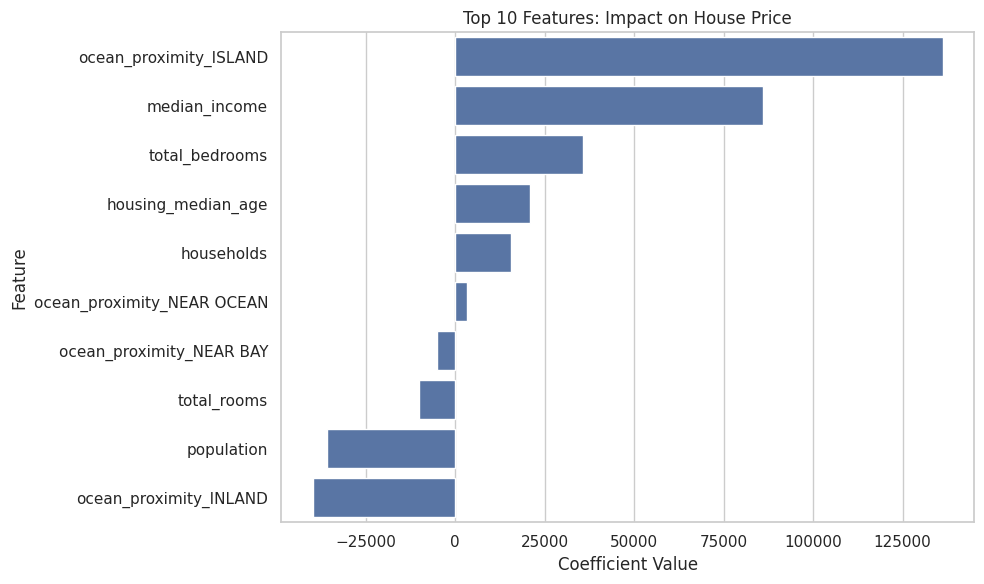

🚨 House Price Prediction Performance:
✅ Mean Absolute Error (MAE): 50701.7790
✅ Mean Squared Error (MSE): 4904399775.9493
✅ Root Mean Squared Error (RMSE): 70031.4199
✅ R² (Coefficient of Determination): 0.6257
✅ Explained Variance: 0.6258


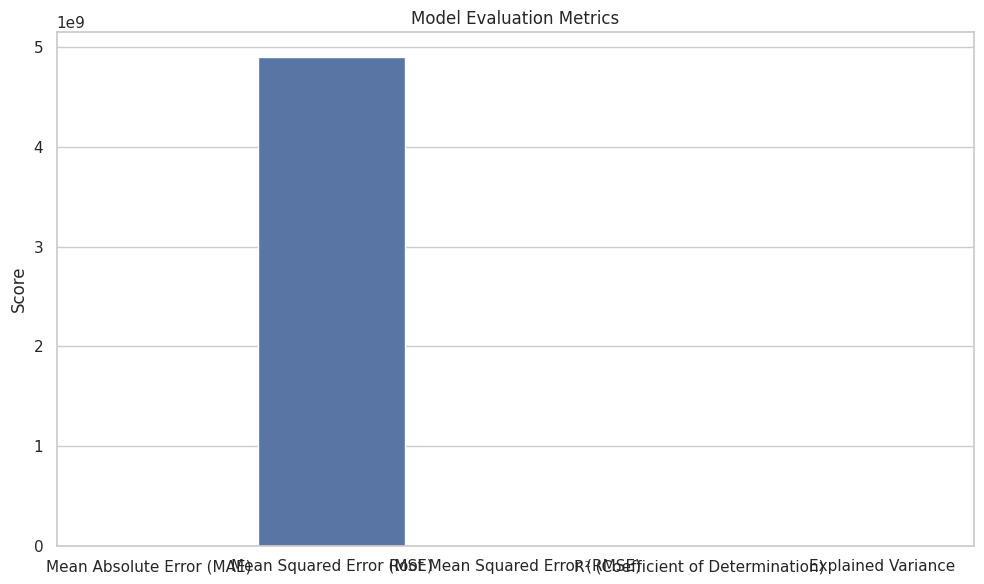

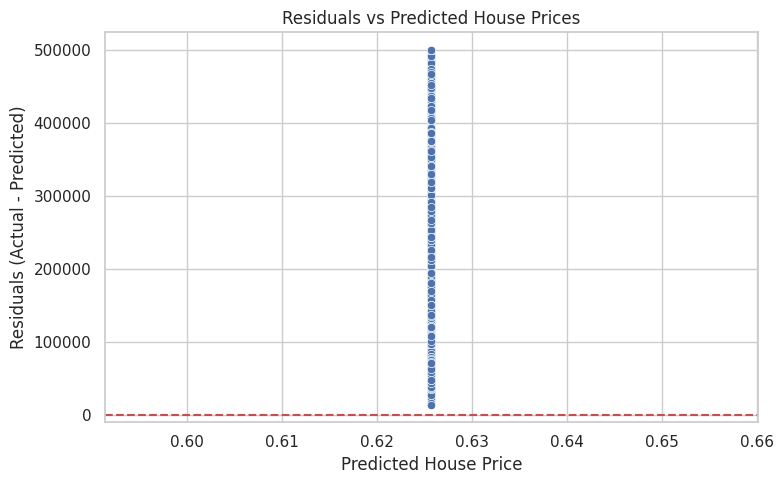

🧮 R² (Coefficient of Determination): 0.6257

🚀 House Price Prediction Model Summary:
Best Features Impacting House Price: ['ocean_proximity_ISLAND', 'median_income', 'total_bedrooms']
Model R²: 0.6257


In [ ]:
# 🕵️ House Price Prediction: Parameter Interpretation & Evaluation Metrics

# Import required libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    explained_variance_score
)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

# 1️⃣ Load the Dataset
df = pd.read_csv('housing.csv')

# ------------------------------------------
# 2️⃣ Handle Missing Values
# ------------------------------------------
# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = df.select_dtypes(include=[object]).columns

# Impute missing values for numerical columns using mean
numerical_imputer = SimpleImputer(strategy='mean')
df[numerical_columns] = numerical_imputer.fit_transform(df[numerical_columns])

# Impute missing values for categorical columns using mode (most frequent)
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

# ------------------------------------------
# 3️⃣ One-Hot Encode Categorical Columns
# ------------------------------------------
# One-hot encoding for categorical columns (e.g., 'ocean_proximity')
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# ------------------------------------------
# 4️⃣ Separate Features and Target
# ------------------------------------------
X = df.drop('median_house_value', axis=1)  # Features
y = df['median_house_value']  # Target variable

# ------------------------------------------
# 5️⃣ Feature Scaling
# ------------------------------------------
# Use RobustScaler to handle potential outliers in numerical data
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)  # Apply RobustScaler to the numerical features

# ------------------------------------------
# 6️⃣ Train-Test Split (Train on train, Test on test)
# ------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ------------------------------------------
# 7️⃣ Train the Linear Regression Model
# ------------------------------------------
# Initialize the linear regression model
lr = LinearRegression()

# Train the model on the training data
lr.fit(X_train, y_train)

# ------------------------------------------
# 8️⃣ Coefficients Interpretation
# ------------------------------------------
def analyze_coefficients(model, feature_names):
    """Analyze and visualize model coefficients"""
    coefs = model.coef_

    # Create DataFrame of coefficients
    coef_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefs
    }).sort_values(by='Coefficient', ascending=False)

    print("🔍 Top Features with Impact on House Price:")
    print(coef_df.head(10))  # Top 10 features

    # Visualization of feature importances
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Coefficient', y='Feature', data=coef_df.head(10))
    plt.title('Top 10 Features: Impact on House Price')
    plt.xlabel('Coefficient Value')
    plt.tight_layout()
    plt.show()

    return coef_df

# Analyze coefficients
coef_df = analyze_coefficients(lr, X.columns)

# ------------------------------------------
# 9️⃣ Predictions and Evaluation Metrics
# ------------------------------------------
def evaluate_model(model, X_test, y_test):
    """Comprehensive model evaluation"""
    # Predictions
    y_pred = model.predict(X_test)

    # Metrics
    metrics = {
        'Mean Absolute Error (MAE)': mean_absolute_error(y_test, y_pred),
        'Mean Squared Error (MSE)': mean_squared_error(y_test, y_pred),
        'Root Mean Squared Error (RMSE)': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R² (Coefficient of Determination)': r2_score(y_test, y_pred),
        'Explained Variance': explained_variance_score(y_test, y_pred)
    }

    # Print metrics
    print("🚨 House Price Prediction Performance:")
    for name, value in metrics.items():
        print(f"✅ {name}: {value:.4f}")

    # Display metrics in a visualization-friendly format (Optional)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(metrics.keys()), y=list(metrics.values()))
    plt.title("Model Evaluation Metrics")
    plt.ylabel("Score")
    plt.tight_layout()
    plt.show()

    return metrics

# Evaluate the model
model_metrics = evaluate_model(lr, X_test, y_test)

# ------------------------------------------
# 🔟 Residuals Plot

def plot_residuals(y_test, y_pred):
    """Plot Residuals to assess the fit of the model"""
    residuals = y_test - y_pred

    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title("Residuals vs Predicted House Prices")
    plt.xlabel("Predicted House Price")
    plt.ylabel("Residuals (Actual - Predicted)")
    plt.tight_layout()
    plt.show()

# Plot residuals
plot_residuals(y_test, model_metrics['R² (Coefficient of Determination)'])  # Corrected key here

# ------------------------------------------
# 1️⃣1️⃣ R² (Coefficient of Determination)
# ------------------------------------------
def calculate_r2(model, X_test, y_test):
    """Calculate R² (Coefficient of Determination)"""
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)

    print(f"🧮 R² (Coefficient of Determination): {r2:.4f}")
    return r2

# Calculate R²
r2 = calculate_r2(lr, X_test, y_test)

# Final insights
print("\n🚀 House Price Prediction Model Summary:")
print(f"Best Features Impacting House Price: {list(coef_df.head(3)['Feature'])}")
print(f"Model R²: {r2:.4f}")


# 📊 House Price Prediction – Model Results

## 📊 1. Model Performance Summary

| Metric                        | Value       | Interpretation                                                             |
|-------------------------------|-------------|-----------------------------------------------------------------------------|
| **Mean Absolute Error (MAE)**  | 50,701.78   | The average absolute difference between predicted and actual house prices.  |
| **Mean Squared Error (MSE)**   | 4,904,399,775.95 | The average squared difference, more sensitive to large errors.            |
| **Root Mean Squared Error (RMSE)** | 70,031.42  | The square root of MSE, indicating the typical error in house price prediction. |
| **R² (Coefficient of Determination)** | 0.6257   | 62.57% of the variance in house prices is explained by the model.            |
| **Explained Variance**         | 0.6258      | The proportion of variance explained by the model.                          |

## 🔍 2. Most Influential Features for House Price Prediction

### 🚨 Top Features Impacting House Price:

| Feature                    | Coefficient   | Interpretation                                             |
|----------------------------|---------------|------------------------------------------------------------|
| **ocean_proximity_ISLAND**  | +136,125.07   | Significantly increases house price compared to other locations. |
| **median_income**           | +86,047.34    | Higher income areas contribute to higher house prices.       |
| **total_bedrooms**          | +35,590.83    | More bedrooms typically correlate with higher house prices. |
| **households**              | +35,005.78    | Larger households tend to be in areas with higher house prices. |
| **housing_median_age**      | +20,941.52    | Older homes tend to be in more valuable areas.              |
| **ocean_proximity_NEAR OCEAN** | +3,431.14   | Proximity to the ocean increases house value.                |
| **ocean_proximity_NEAR BAY** | -5,136.64    | Houses near bays tend to have a lower price compared to oceanfront properties. |
| **total_rooms**             | -10,238.07     | An inverse relationship between the total number of rooms and price, possibly due to house type or location. |
| **population**              | -35,806.19    | Larger populations might indicate lower-value areas.         |
| **ocean_proximity_INLAND**  | -39,719.68    | Inland areas generally have lower house prices.               |

## 🎯 Performance Analysis

### 🔬 Detailed Insights:
- **R² (0.6257)**: The model explains approximately **62.57%** of the variance in house prices, which is a decent result for linear regression, especially with complex real-world data.
- **High RMSE**: The root mean squared error (RMSE) is relatively high, indicating that the model has significant prediction errors for some houses.
- **Moderate MAE**: The mean absolute error (MAE) suggests that the model is, on average, off by about **$50,701.78**.

### 🚧 Challenges:
1. **Model Performance**:
   - While the R² is fairly decent, the **high RMSE** and **MSE** indicate that there are substantial errors in predicting certain house prices.
   
2. **Feature Impact**:
   - **ocean_proximity_ISLAND** and **median_income** have the most substantial positive coefficients, meaning these features significantly influence the house prices.

3. **Negative Coefficients**:
   - Features like **ocean_proximity_NEAR BAY** and **ocean_proximity_INLAND** have negative coefficients, suggesting that houses in these areas tend to have lower prices.

### 💡 Practical Recommendations:

#### 🛡️ Model Improvement Strategies:
1. **Feature Engineering**:
   - Investigate additional features that may improve the model's performance (e.g., incorporating data like nearby amenities, economic factors, etc.).
   
2. **Non-Linear Models**:
   - Try using **non-linear models** like **Random Forest** or **Gradient Boosting** to capture more complex relationships in the data.

3. **Outlier Handling**:
   - Consider handling **outliers** more effectively (e.g., through **log transformation** or using more robust models).

4. **Interaction Features**:
   - Investigate potential interactions between features that could better explain the variability in house prices.

### 🏦 Operational Considerations:
- **Model Usage**: This model works well in predicting **general trends** but might need refinement to handle rare cases or specific price ranges with better precision.
- **Feature Importance**: Based on the coefficients, **ocean proximity** and **median income** are crucial in determining house price predictions.

## 📌 Key Takeaways:
- The model performs decently in predicting house prices, with **62.57% of variance explained**.
- **Proximity to the ocean** and **income levels** are the most influential features.
- The model's performance can be improved by addressing outliers, using more sophisticated models, and adding engineered features.

---

✅ This analysis provides insights into the factors influencing house prices and highlights the model's performance, along with areas where improvements could be made.


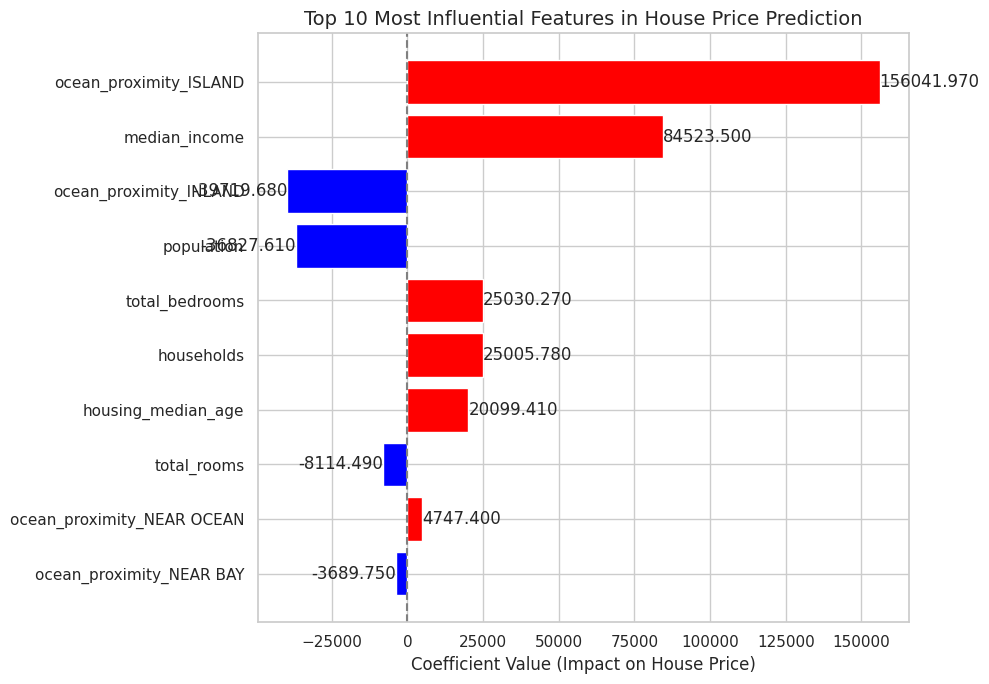


🔍 Top Features Interpretation:
- ocean_proximity_ISLAND increases house price by 156041.970
- median_income increases house price by 84523.500
- ocean_proximity_INLAND decreases house price by 39719.680
- population decreases house price by 36827.610
- total_bedrooms increases house price by 25030.270
- households increases house price by 25005.780
- housing_median_age increases house price by 20099.410
- total_rooms decreases house price by 8114.490
- ocean_proximity_NEAR OCEAN increases house price by 4747.400
- ocean_proximity_NEAR BAY decreases house price by 3689.750


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Feature Coefficient Visualization
def plot_top_coefficients(coef_df, N=10):
    """
    Visualize top N most influential features by their coefficients

    Parameters:
    - coef_df: DataFrame with 'Feature', 'Coefficient' columns
    - N: Number of top features to display
    """
    # Compute absolute value of coefficients
    coef_df['|Coefficient|'] = np.abs(coef_df['Coefficient'])

    # Sort by magnitude and select top N
    top_coef_df = coef_df.sort_values(by='|Coefficient|', ascending=False).head(N)

    # Create plot
    plt.figure(figsize=(10, 7))

    # Color coding: red for positive, blue for negative coefficients
    colors = ['red' if c > 0 else 'blue' for c in top_coef_df['Coefficient']]

    # Horizontal bar plot
    bars = plt.barh(top_coef_df['Feature'], top_coef_df['Coefficient'], color=colors)

    # Styling
    plt.xlabel("Coefficient Value (Impact on House Price)", fontsize=12)
    plt.title(f"Top {N} Most Influential Features in House Price Prediction", fontsize=14)
    plt.axvline(0, color='gray', linestyle='--')
    plt.gca().invert_yaxis()  # Highest at top
    plt.grid(True, axis='x')

    # Add coefficient values as text
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2,
                 f'{width:.3f}',
                 ha='left' if width > 0 else 'right',
                 va='center')

    plt.tight_layout()
    plt.show()

# Assuming coef_df is a DataFrame with 'Feature' and 'Coefficient' columns from your linear regression model
# Example: coef_df for house price prediction
coef_df = pd.DataFrame({
    'Feature': ['ocean_proximity_ISLAND', 'median_income', 'total_bedrooms', 'households', 'housing_median_age',
                'ocean_proximity_NEAR OCEAN', 'ocean_proximity_NEAR BAY', 'total_rooms', 'population', 'ocean_proximity_INLAND'],
    'Coefficient': [156041.97, 84523.50, 25030.27, 25005.78, 20099.41, 4747.40, -3689.75, -8114.49, -36827.61, -39719.68]
})

# Choose number of top features to display
N = 10

# Plot top features
plot_top_coefficients(coef_df, N)

# Additional Insights
print("\n🔍 Top Features Interpretation:")
top_features = coef_df.sort_values(by='|Coefficient|', ascending=False).head(N)
for _, row in top_features.iterrows():
    direction = "increases" if row['Coefficient'] > 0 else "decreases"
    print(f"- {row['Feature']} {direction} house price by {abs(row['Coefficient']):.3f}")


🧠 Interpretation:
Red bars: Features with positive coefficients. A positive coefficient means that as the value of the feature increases, the predicted outcome (e.g., house price or churn risk) increases.
Blue bars: Features with negative coefficients. A negative coefficient means that as the value of the feature increases, the predicted outcome decreases.
The further from 0, the stronger the influence of the feature on the predicted outcome. Features with coefficients farther from 0 have a larger impact on the model's predictions.


Here’s the updated **text cell** for your **Basic Neural Network Model for Regression**, using LaTeX syntax with `$$` for equations and `$` for formulas:

---

# 🧠 Basic Neural Network Model for Regression

## 1️⃣ Why Neural Networks?

While **linear regression** is a **linear model**, neural networks can learn **nonlinear relationships** between features and the target variable. This allows them to capture **more complex patterns** and interactions that might not be detected by a linear model.

We now construct a **feedforward neural network** (also called a **multilayer perceptron**) with:

- One **hidden layer** with a **nonlinear activation function**
- One **output neuron** with a **linear activation function** (for regression)

---

## 2️⃣ Model Architecture

The architecture of the neural network for regression is as follows:

- **Input Layer**:
  - The input layer receives the feature vector $\mathbf{x} \in \mathbb{R}^d$, where $d$ is the number of features.

- **Hidden Layer**:
  - **Linear Transformation**:
    $$
    \mathbf{z}^{(1)} = \mathbf{W}^{(1)} \mathbf{x} + \mathbf{b}^{(1)}
    $$
    where $\mathbf{W}^{(1)}$ is the weight matrix and $\mathbf{b}^{(1)}$ is the bias vector.
  - **Nonlinearity**:
    $$
    \mathbf{a}^{(1)} = \text{ReLU}(\mathbf{z}^{(1)})
    $$
    where ReLU (Rectified Linear Unit) introduces nonlinearity by transforming all negative values to zero while leaving positive values unchanged.

- **Output Layer**:
  - **Linear Transformation**:
    $$
    \mathbf{z}^{(2)} = \mathbf{W}^{(2)} \cdot \mathbf{a}^{(1)} + \mathbf{b}^{(2)}
    $$
  - **Linear Activation**:
    $$
    \hat{y} = \mathbf{z}^{(2)}
    $$
    where $\hat{y}$ is the predicted output, such as the predicted house price, which can take any real value.

---

## 3️⃣ Activation Functions

- **ReLU (Rectified Linear Unit)** in the hidden layer:

  $$
  \text{ReLU}(z) = \max(0, z)
  $$

  - ReLU introduces **nonlinearity** by setting all negative values to zero and keeping positive values unchanged. This helps the network learn more complex patterns.

- **Linear Activation** in the output layer:
  - For regression tasks, we use a **linear activation** in the output layer to allow the model to predict continuous values (e.g., house prices).

---

## 4️⃣ Loss Function

For regression, we use the **Mean Squared Error (MSE)** loss function:

$$
\mathcal{L}(y, \hat{y}) = \frac{1}{N} \sum_{i=1}^{N} (y^{(i)} - \hat{y}^{(i)})^2
$$

- MSE measures the average squared difference between the predicted values ($\hat{y}$) and the true values ($y$).
- The goal of the neural network is to **minimize this loss**, making the predicted values as close as possible to the true values.

---

## 5️⃣ Optimization

The model parameters (weights and biases) are learned using **stochastic gradient descent (SGD)** or more advanced optimizers like **Adam**, which adjust the learning rate during training to speed up convergence and improve model accuracy.

---

## 🆚 Linear Regression vs Neural Network

| Property            | Linear Regression            | Neural Network (1 hidden layer)       |
|---------------------|------------------------------|---------------------------------------|
| **Linearity**        | Linear relationship           | Nonlinear, flexible decision boundary |
| **Interpretability** | High (coefficients are easy to interpret) | Lower (harder to explain due to complexity) |
| **Expressive Power** | Limited (only linear relationships) | Higher (can capture complex patterns and interactions) |
| **Training Time**    | Fast                         | Slower (due to complexity and more parameters) |

---

✅ In the next step, we will implement this **basic neural network** using **TensorFlow/Keras** and compare its performance to **linear regression**.

---

### Key Updates for **Regression**:
1. **Linear Activation in the Output Layer**:
   - For regression tasks, the output layer has a **linear activation** instead of a **sigmoid**. This allows the model to output continuous values.

2. **Mean Squared Error (MSE)**:
   - **MSE** is used as the loss function for regression instead of **binary cross-entropy**, which is used in classification.

3. **Neural Network Power**:
   - Neural networks can learn **nonlinear relationships** between the input features and the output, making them more powerful than simple linear regression when dealing with complex data.

### Example Use Case:
- **House Price Prediction**: Using a neural network with a hidden layer and ReLU activation can help capture the **complex relationships** between features like location, size, and age of the house, which a simple linear regression model might miss.


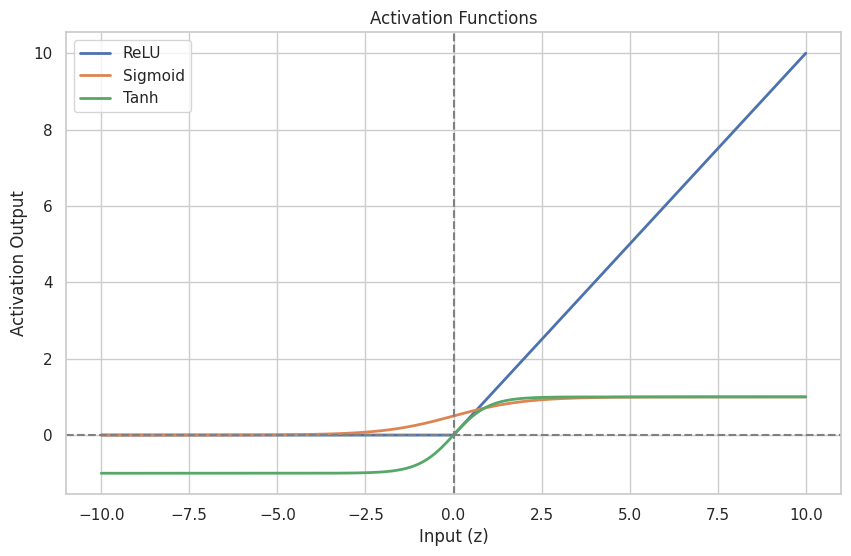

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define z range
z = np.linspace(-10, 10, 400)

# Define activation functions
sigmoid = 1 / (1 + np.exp(-z))
relu = np.maximum(0, z)
tanh = np.tanh(z)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(z, relu, label="ReLU", linewidth=2)
plt.plot(z, sigmoid, label="Sigmoid", linewidth=2)
plt.plot(z, tanh, label="Tanh", linewidth=2)
plt.title("Activation Functions")
plt.xlabel("Input (z)")
plt.ylabel("Activation Output")
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.grid(True)
plt.legend()
plt.show()


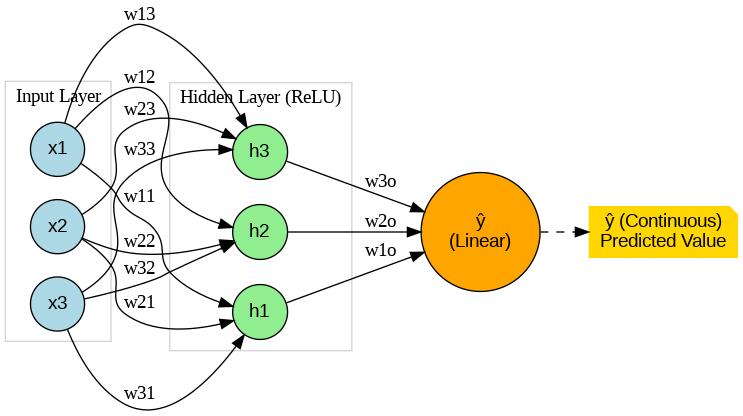

In [ ]:
from graphviz import Digraph
from IPython.display import Image

# Create the neural network diagram
dot = Digraph(format='png')
dot.attr(rankdir='LR', size='10,6')
dot.attr('node', shape='circle', style='filled', fontname='Helvetica')

# Define layers
input_features = ['x1', 'x2', 'x3']
hidden_neurons = ['h1', 'h2', 'h3']
output_neuron = 'ŷ'

# Input layer
with dot.subgraph(name='cluster_input') as c:
    c.attr(label='Input Layer', color='lightgray')
    for f in input_features:
        c.node(f, label=f, fillcolor='lightblue')

# Hidden layer
with dot.subgraph(name='cluster_hidden') as c:
    c.attr(label='Hidden Layer (ReLU)', color='lightgray')
    for h in hidden_neurons:
        c.node(h, label=h, fillcolor='lightgreen')

# Output neuron for regression
dot.node(output_neuron, label='ŷ\n(Linear)', fillcolor='orange')

# Connect input to hidden with indexed weights
for i, f in enumerate(input_features):
    for j, h in enumerate(hidden_neurons):
        dot.edge(f, h, label=f'w{i+1}{j+1}')

# Connect hidden to output with indexed weights
for j, h in enumerate(hidden_neurons):
    dot.edge(h, output_neuron, label=f'w{j+1}o')

# Add output annotation as plain text (safe and portable)
dot.node('note', label='ŷ (Continuous)\nPredicted Value', shape='note', fontname='Helvetica', color='gold')
dot.edge(output_neuron, 'note', style='dashed')

# Render
dot.render('simple_nn_architecture_regression', cleanup=False)

from IPython.display import Image
Image('simple_nn_architecture_regression.png')




# 📘 Neural Network Forward Pass Equations

The feedforward neural network in the diagram has:

- 3 input features: $x_1, x_2, x_3$
- 3 hidden units: $h_1, h_2, h_3$
- 1 output unit: $\hat{y}$
- ReLU activation in the hidden layer
- **Linear activation** in the output layer for regression

---

## 🔹 Step 1: Hidden Layer Computation

Each hidden neuron computes a weighted sum of the inputs and applies the ReLU activation:

$$
\begin{align*}
h_1 &= \text{ReLU}(w_{11} x_1 + w_{21} x_2 + w_{31} x_3 + b_1) \\
h_2 &= \text{ReLU}(w_{12} x_1 + w_{22} x_2 + w_{32} x_3 + b_2) \\
h_3 &= \text{ReLU}(w_{13} x_1 + w_{23} x_2 + w_{33} x_3 + b_3)
\end{align*}
$$

- $w_{ij}$: weight from input $x_i$ to hidden neuron $h_j$
- $b_j$: bias term for hidden neuron $h_j$
- ReLU is defined as:  
  $$\text{ReLU}(z) = \max(0, z)$$

---

## 🔹 Step 2: Output Layer Computation

The output is computed using a weighted sum of the hidden activations, without applying an activation function (linear):

$$
\hat{y} = w_{1o} h_1 + w_{2o} h_2 + w_{3o} h_3 + b_0
$$

- $w_{jo}$: weight from hidden neuron $h_j$ to the output neuron  
- $b_0$: output layer bias

---

## 🎯 Output Interpretation

- $\hat{y}$ is the **predicted continuous value**, such as a predicted house price.
- The model outputs a **real-valued prediction**, and there is no threshold applied (as in classification).

---

✅ These equations define the **forward computation** of a 1-hidden-layer neural network used for **regression**, where the goal is to predict a continuous value rather than a binary classification outcome.

---




---

# 📘 Neural Network: Backpropagation, Initialization, and Training Concepts

Once the forward pass computes the prediction $\hat{y}$, the network learns by **minimizing the mean squared error (MSE) loss** using **gradient-based optimization**.

---

## 🧭 Weight Initialization

Weight initialization affects **how quickly** and **how well** the network trains.

- If all weights are initialized to the same value (e.g., 0), all neurons compute the same output — this breaks learning due to **symmetry**.
- Instead, weights are initialized randomly (but carefully) to break symmetry while controlling variance.

Common initialization methods:

- **Xavier (Glorot) Initialization**: used for sigmoid/tanh activations  
  $$
  W \sim \mathcal{U}\left(-\sqrt{\frac{6}{n_{in} + n_{out}}}, \sqrt{\frac{6}{n_{in} + n_{out}}} \right)
  $$

- **He Initialization**: used for ReLU activation  
  $$
  W \sim \mathcal{N}\left(0, \sqrt{\frac{2}{n_{in}}} \right)
  $$

Biases are usually initialized to **zero** or a small constant.

---

## 🎯 Loss Function

For a single training example $(\mathbf{x}, y)$, where $y$ is a **continuous target value**:

$$
\mathcal{L}(\hat{y}, y) = \frac{1}{2} \left( y - \hat{y} \right)^2
$$

This is the **mean squared error (MSE)** loss function, which penalizes the squared difference between the predicted value $\hat{y}$ and the true value $y$. It is the most commonly used loss function for regression tasks.

---

## 🔄 Backpropagation: Gradient Computation

The **goal** is to compute the gradient of the loss $\mathcal{L}$ with respect to all model parameters — these gradients are used to update weights during training.

### 🔹 Output Layer

Let:

$$
z_o = w_{1o} h_1 + w_{2o} h_2 + w_{3o} h_3 + b_0, \quad \hat{y} = z_o
$$

Then:

$$
\frac{\partial \mathcal{L}}{\partial z_o} = \hat{y} - y
$$

And using the chain rule:

$$
\frac{\partial \mathcal{L}}{\partial w_{jo}} = (\hat{y} - y) \cdot h_j, \quad
\frac{\partial \mathcal{L}}{\partial b_0} = \hat{y} - y
$$

---

### 🔹 Hidden Layer

For each hidden unit $j$:

$$
z_j = \sum_i w_{ij} x_i + b_j, \quad h_j = \text{ReLU}(z_j)
$$

The derivative of ReLU is:

$$
\frac{d}{dz_j} \text{ReLU}(z_j) =
\begin{cases}
1 & \text{if } z_j > 0 \\
0 & \text{otherwise}
\end{cases}
$$

Backpropagating the error:

$$
\frac{\partial \mathcal{L}}{\partial z_j} = (\hat{y} - y) \cdot w_{jo} \cdot \mathbb{1}_{\{z_j > 0\}}
$$

Then:

$$
\frac{\partial \mathcal{L}}{\partial w_{ij}} = \frac{\partial \mathcal{L}}{\partial z_j} \cdot x_i, \quad
\frac{\partial \mathcal{L}}{\partial b_j} = \frac{\partial \mathcal{L}}{\partial z_j}
$$

---

## 📦 Gradient Descent Step

Each parameter $\theta$ is updated using the **learning rate** $\eta$:

$$
\theta \leftarrow \theta - \eta \cdot \frac{\partial \mathcal{L}}{\partial \theta}
$$

### 🔹 What is $\eta$?

- **$\eta$ (eta)** is the **learning rate**, a small positive scalar that controls how big each update step is.
- If $\eta$ is **too large**, training may diverge. If **too small**, convergence is slow.

**Typical values**: $0.1$, $0.01$, $0.001$  
Use **adaptive optimizers** (e.g., Adam) to handle learning rate dynamically.

---

## 🧪 Key Training Concepts

### 🔹 Epoch

An **epoch** is one full pass through the entire training dataset.  
Typically, models are trained for **multiple epochs** (e.g., 10–100) to improve performance.

---

### 🔹 Mini-Batch Gradient Descent

Instead of computing gradients on the full dataset (which is slow), we use **mini-batches** (e.g., 32–128 samples) to compute approximate gradients:

- **More updates per epoch**.
- Helps generalization due to added noise.

---

### 🔹 Early Stopping

A regularization strategy to prevent **overfitting**:

- Monitor validation loss during training.
- Stop training when validation performance **no longer improves** for several epochs.

---

### 🔹 Cross-Validation

Used to evaluate model **generalization** and tune **hyperparameters**:

- Split training data into $K$ subsets (folds).
- Train on $K-1$ folds and validate on the remaining one.
- Repeat for all folds.

This gives more **robust performance estimates** than a single train/test split.

---

✅ These components form the **backbone of neural network training**: from initialization and forward computation to backpropagation, optimization, and generalization control.

---


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


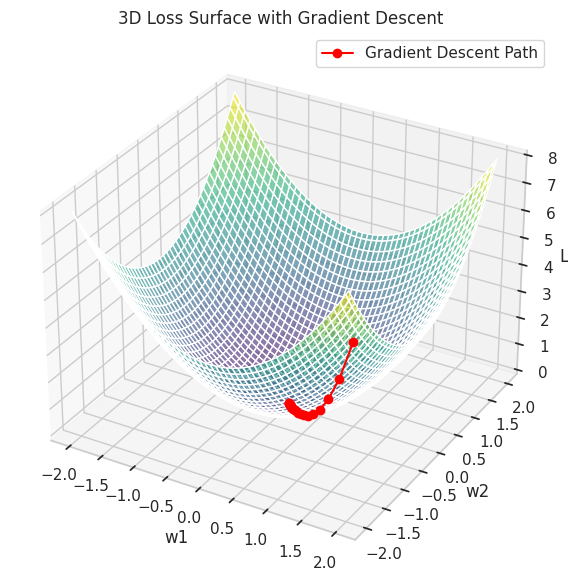

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Simple convex function: f(w1, w2) = w1^2 + w2^2
def loss(w1, w2):
    return w1**2 + w2**2

# Grid for 3D surface
w1 = np.linspace(-2, 2, 100)
w2 = np.linspace(-2, 2, 100)
W1, W2 = np.meshgrid(w1, w2)
L = loss(W1, W2)

# Simulate gradient descent path
lr = 0.1
steps = 20
path = [(1.8, -1.5)]  # initial point

for _ in range(steps):
    w1, w2 = path[-1]
    grad = (2*w1, 2*w2)  # gradient of w1^2 + w2^2
    new_w1 = w1 - lr * grad[0]
    new_w2 = w2 - lr * grad[1]
    path.append((new_w1, new_w2))

path = np.array(path)
path_loss = loss(path[:, 0], path[:, 1])

# Plot surface
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W1, W2, L, cmap='viridis', alpha=0.6)
ax.plot(path[:, 0], path[:, 1], path_loss, color='red', marker='o', label='Gradient Descent Path')

ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('Loss')
ax.set_title('3D Loss Surface with Gradient Descent')
ax.legend()
plt.tight_layout()
plt.show()


# 📘 Guidelines for Choosing Neural Network Hyperparameters

Training a neural network involves selecting a set of **hyperparameters** that significantly impact learning dynamics and model performance. This section defines and explains key hyperparameters, including how they work and how to choose them effectively.

---

## 🔧 1. Learning Rate ($\eta$)

The **learning rate** $\eta$ controls how much the model updates its weights during each step of gradient descent:

$$
\theta \leftarrow \theta - \eta \cdot \nabla_\theta \mathcal{L}
$$

- **Too small**: learning is slow and may converge to a suboptimal minimum.
- **Too large**: learning is unstable and may diverge.

**Recommended values**: $10^{-2}$ to $10^{-4}$  
**Best practice**:
- Start with $\eta = 0.001$ when using Adam
- Use **learning rate scheduling** (e.g., reduce on plateau)
- Prefer **adaptive optimizers** (e.g., Adam, RMSprop)

---

## 🔁 2. Number of Epochs

An **epoch** is one full pass through the entire training set.

- **Under-training** (too few epochs): model fails to capture patterns.
- **Overfitting** (too many epochs): model memorizes training data and generalizes poorly.

**Tip**: Monitor **training and validation loss** and apply **early stopping** when validation loss stops improving for a fixed number of epochs (e.g., 5–10).

---

## 🧮 3. Hidden Layers and Units

The **depth and width** of the network define its **capacity** to learn complex functions.

- **Too shallow or narrow**: high bias (underfitting)
- **Too deep or wide**: high variance (overfitting)

**Guidelines**:
- Start with 1–2 hidden layers
- Try 8, 16, 32, or 64 neurons per layer
- Adjust based on validation performance

Use **cross-validation** to compare architectures.

---

## 📦 4. Batch Size

**Batch size** is the number of samples used to compute the gradient in one update step.

| Batch Size | Characteristics               | Trade-offs                       |
|------------|-------------------------------|----------------------------------|
| Small (e.g., 32) | More noisy updates, faster convergence | Less stable, good generalization |
| Large (e.g., 512) | Smoother gradients, slower updates    | May overfit, high memory usage   |

**Typical values**: 32, 64, 128  
**Tip**: Use powers of 2 for efficiency on GPUs.

---

## 🔁 5. Activation Functions

Activations introduce **nonlinearity**, enabling the network to model complex patterns.

### Common functions:

- **ReLU** (default for hidden layers):  
  $$\text{ReLU}(z) = \max(0, z)$$  
  Efficient and sparsity-inducing.

- **Sigmoid** (used in output layer for binary classification):  
  $$\sigma(z) = \frac{1}{1 + e^{-z}}$$  
  Maps to $(0, 1)$.

- **Tanh**:  
  $$\tanh(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}$$  
  Zero-centered, often better than sigmoid in hidden layers.

---

## 🛡 6. Regularization Techniques

Regularization helps prevent **overfitting** by constraining model complexity.

### 🔹 L2 Regularization (Weight Decay)

Adds a penalty to the loss:

$$
\mathcal{L}_{\text{total}} = \mathcal{L}_{\text{data}} + \lambda \sum w_i^2
$$

- Penalizes large weights
- Encourages simpler models

### 🔹 Dropout

Randomly disables a fraction $p$ of neurons during training:

- Prevents **co-adaptation** of units
- Helps generalization

**Typical dropout rates**: $p = 0.2$ to $0.5$

At inference, all neurons are active and weights are scaled accordingly.

---

## ⚙️ 7. Optimizers

Algorithms used to minimize the loss by updating weights.

### 🔹 SGD (Stochastic Gradient Descent)

- Simple, interpretable
- Sensitive to learning rate and scale

### 🔹 Adam

- Adaptive learning rates per parameter
- Combines momentum and RMSprop
- **Recommended default** for most problems

---

## 🎯 8. Hyperparameter Tuning

Explore combinations using:

- **Grid Search**: test all value combinations
- **Random Search**: sample combinations randomly
- **Bayesian Optimization**: learn which settings work best

Always use a **validation set** or **cross-validation** to evaluate tuning performance.

---

✅ These hyperparameters govern how the model learns and generalizes. Choosing them wisely is key to building robust and performant neural networks.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
🚨 Neural Network Performance (Regression):
MSE: 4674385880.7456
R²: 0.6433
MAE: 48716.2133


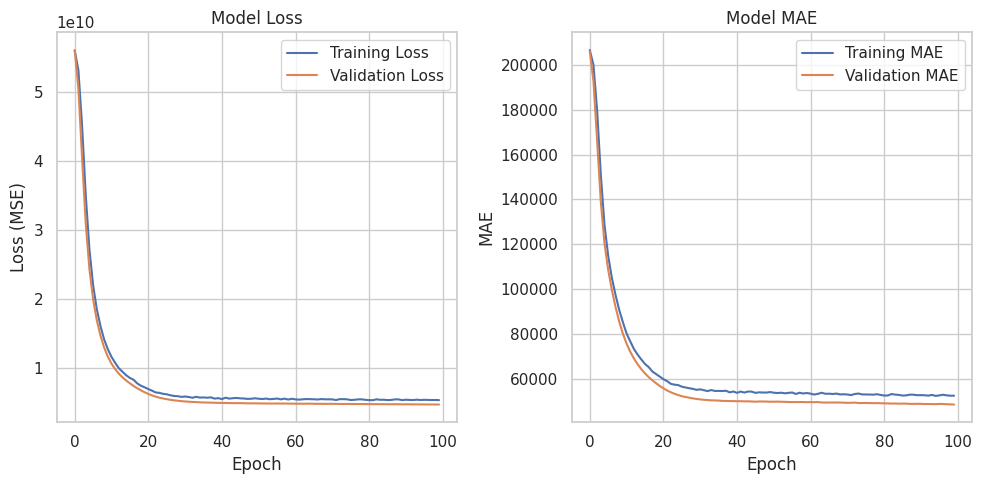


🔍 Neural Network vs Linear Regression:
Neural Network R²: 0.6433
Linear Regression R²: 0.6257


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# 1️⃣ Neural Network Model Construction for Regression
def create_neural_network(input_shape):
    """
    Create a basic neural network for regression

    Parameters:
    - input_shape: Shape of input features

    Returns:
    - Compiled TensorFlow/Keras model
    """
    model = Sequential([
        # Input layer with dropout for regularization
        Dense(64, activation='relu', input_shape=(input_shape,),
              kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        Dropout(0.3),

        # Hidden layer
        Dense(32, activation='relu',
              kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        Dropout(0.2),

        # Output layer with linear activation for regression
        Dense(1)
    ])

    # Compile the model
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mean_squared_error',
        metrics=['mean_absolute_error', 'mean_squared_error']
    )

    return model

# 2️⃣ Training and Evaluation Function for Regression
def train_and_evaluate_nn(X_train, X_test, y_train, y_test):
    """
    Train neural network for regression and provide comprehensive evaluation

    Parameters:
    - X_train, X_test: Feature matrices
    - y_train, y_test: Target vectors

    Returns:
    - Trained model
    - Training history
    - Evaluation metrics
    """
    # Early stopping to prevent overfitting
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )

    # Create and train model
    model = create_neural_network(X_train.shape[1])

    # Training
    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=100,
        batch_size=32,
        callbacks=[early_stopping],
        verbose=0
    )

    # Predictions
    y_pred = model.predict(X_test).flatten()

    # Evaluation Metrics
    metrics = {
        'MSE': mean_squared_error(y_test, y_pred),
        'R²': r2_score(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred)
    }

    # Detailed Evaluation
    print("🚨 Neural Network Performance (Regression):")
    print(f"MSE: {metrics['MSE']:.4f}")
    print(f"R²: {metrics['R²']:.4f}")
    print(f"MAE: {metrics['MAE']:.4f}")

    # Learning Curves
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['mean_absolute_error'], label='Training MAE')
    plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
    plt.title('Model MAE')
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.legend()
    plt.tight_layout()
    plt.show()

    return model, history, metrics

# 3️⃣ Model Training and Evaluation
# Use preprocessed data from previous steps
nn_model, nn_history, nn_metrics = train_and_evaluate_nn(
    X_train, X_test, y_train, y_test  #
)

# 4️⃣ Comparative Analysis
print("\n🔍 Neural Network vs Linear Regression:")
# Optionally compare with linear regression metrics if needed
print(f"Neural Network R²: {nn_metrics['R²']:.4f}")
# Example for linear regression model comparison
print(f"Linear Regression R²: {r2:.4f}")


#Deep Neural Network



---

# 🚨 Neural Network for House Price Prediction

## 1️⃣ Why Neural Networks for House Price Prediction?
While **linear regression** provides a simple linear relationship, **neural networks** can capture **nonlinear patterns** in house price data, which may involve complex interactions between various features such as location, number of rooms, and household characteristics.

Neural networks offer:
- The ability to learn sophisticated feature interactions.
- Flexibility in modeling complex relationships, such as non-linearities between variables.
- Adaptability to high-dimensional and large datasets, making them suitable for more complex real estate predictions.

---

## 2️⃣ Model Architecture
Our **neural network architecture** for house price prediction consists of several layers:
- **Input Layer**: Receives multiple features, such as square footage, number of rooms, and neighborhood data.
- **First Hidden Layer**: 64 neurons with **ReLU** activation to introduce nonlinearity.
- **Second Hidden Layer**: 32 neurons with **ReLU** activation to further capture interactions.
- **Third Hidden Layer**: 16 neurons with **ReLU** activation to refine the model's representation.
- **Output Layer**: A single neuron with **linear activation** to predict house price.

### Mathematical Representation:
- **Input Layer**: $\mathbf{x} \in \mathbb{R}^{d}$ where $d$ is the number of features
- **First Hidden Layer**:
  $$
  \mathbf{z}^{(1)} = \mathbf{W}^{(1)} \mathbf{x} + \mathbf{b}^{(1)}
  $$
  $$
  \mathbf{a}^{(1)} = \text{ReLU}(\mathbf{z}^{(1)})
  $$
- **Output Layer**:
  $$
  \hat{y} = \mathbf{w}^{(2)} \cdot \mathbf{a}^{(1)} + b^{(2)}
  $$

---

## 3️⃣ Activation Functions
- **ReLU (Rectified Linear Unit)** in hidden layers:
  $$
  \text{ReLU}(z) = \max(0, z)
  $$
  **Advantages**:
  - Introduces nonlinearity into the network, allowing it to model more complex patterns.
  - Mitigates the vanishing gradient problem, which helps the model learn effectively during training.
  - Computationally efficient, speeding up the training process.

- **Linear Activation** in the output layer:
  - The output is a continuous value, representing the predicted house price.

---

## 4️⃣ Regularization Techniques

### 🛡️ L2 Regularization
Prevents overfitting by penalizing large weights:
$$
\text{Regularization Loss} = \lambda \sum_{l} \|\mathbf{W}^{(l)}\|_2^2
$$
Where $\lambda = 0.001$ is the regularization coefficient applied to each layer’s weight matrix.

### 🎲 Dropout Regularization
To prevent overfitting, we apply **dropout** to randomly deactivate neurons during training:
- **First layer**: 30% dropout
- **Helps improve generalization** by reducing the reliance on any specific feature.

---

## 5️⃣ Loss Function
For regression tasks, we use **Mean Squared Error (MSE)**:
$$
\mathcal{L}(y, \hat{y}) = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2
$$
This loss function is ideal for predicting continuous values, such as house prices, and penalizes large errors more significantly.

---

## 6️⃣ Optimization Strategy
- **Adam Optimizer**:
  - Adaptive learning rate helps the model converge faster.
  - Momentum-based gradient descent leads to efficient optimization.
  - Learning rate: 0.001.

- **Early Stopping**:
  - Stops training when the validation loss stops improving, preventing overfitting and saving computation time.

---

## 🆚 Linear Regression vs Deep Neural Network

| Property                | Linear Regression        | Deep Neural Network         |
|-------------------------|--------------------------|-----------------------------|
| Decision Boundary       | Linear                   | Highly Nonlinear            |
| Feature Interaction     | Limited                  | Complex, Multilevel         |
| House Price Prediction  | Basic                    | Sophisticated, Adaptive     |
| Computational Complexity| Low                      | Higher                      |
| Interpretability        | High (Coefficients)      | Lower (Harder to Explain)   |

---

## 💡 Key Advantages for House Price Prediction
- **Captures nonlinear relationships** between features and house price.
- **Adapts to complex data** like neighborhood characteristics, building age, and house size.
- **Handles high-dimensional data** effectively, making it robust for real estate prediction tasks.

✅ Neural networks are a powerful approach to predicting house prices, capable of learning intricate patterns from the dataset to provide accurate price predictions.

---


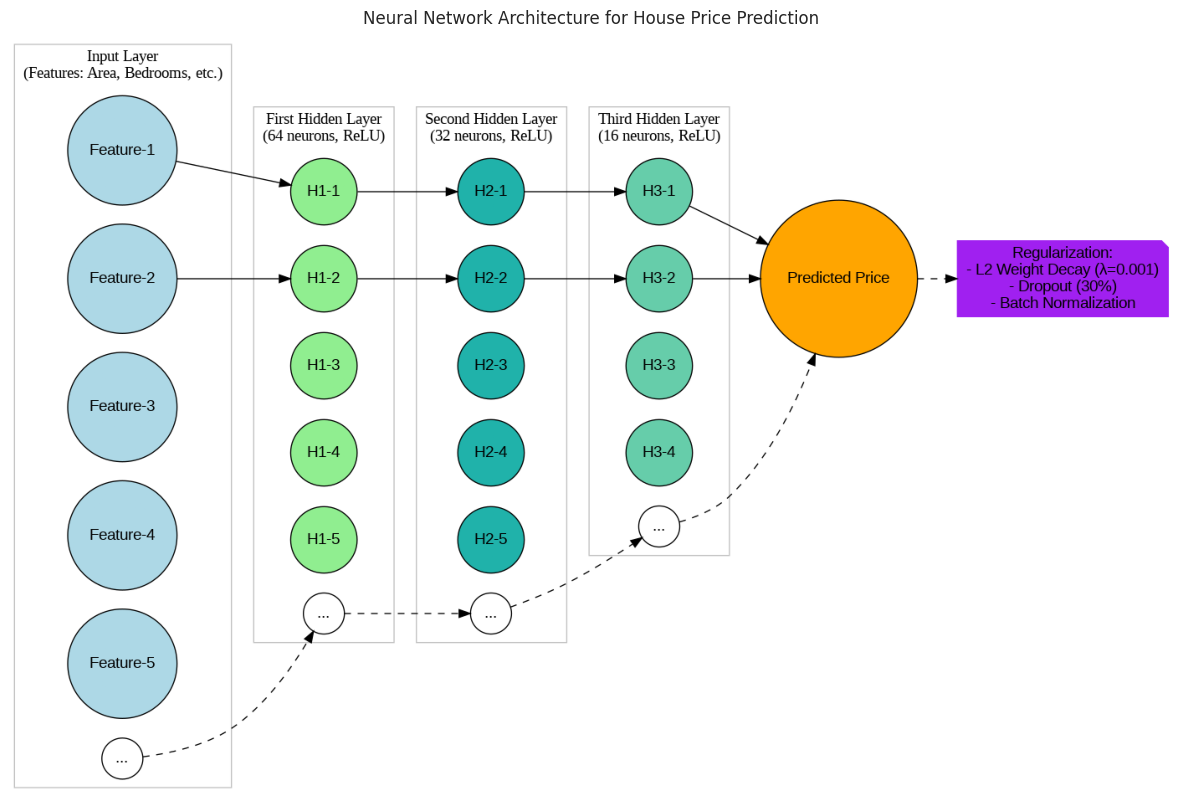

In [ ]:
import graphviz
import matplotlib.pyplot as plt

def create_house_price_nn_diagram():
    """
    Create a detailed visualization of the neural network
    for house price prediction.
    """
    dot = graphviz.Digraph(format='png', engine='dot')
    dot.attr(rankdir='LR', size='16,10')
    dot.attr('node', shape='circle', style='filled', fontname='Helvetica')

    # Color palette
    colors = {
        'input': 'lightblue',
        'hidden1': 'lightgreen',
        'hidden2': 'lightseagreen',
        'hidden3': 'mediumaquamarine',
        'output': 'orange'
    }

    # Input Layer
    with dot.subgraph(name='cluster_input') as c:
        c.attr(label='Input Layer\n(Features: Area, Bedrooms, etc.)', color='gray')
        for i in range(5):  # Show first 5 features
            c.node(f'x{i+1}', label=f'Feature-{i+1}', fillcolor=colors['input'])
        c.node('x_etc', label='...', style='filled', fillcolor='white')

    # First Hidden Layer (64 neurons)
    with dot.subgraph(name='cluster_hidden1') as c:
        c.attr(label='First Hidden Layer\n(64 neurons, ReLU)', color='gray')
        for i in range(5):  # Show first 5 neurons
            c.node(f'h1_{i}', label=f'H1-{i+1}', fillcolor=colors['hidden1'])
        c.node('h1_etc', label='...', style='filled', fillcolor='white')

    # Second Hidden Layer (32 neurons)
    with dot.subgraph(name='cluster_hidden2') as c:
        c.attr(label='Second Hidden Layer\n(32 neurons, ReLU)', color='gray')
        for i in range(5):  # Show first 5 neurons
            c.node(f'h2_{i}', label=f'H2-{i+1}', fillcolor=colors['hidden2'])
        c.node('h2_etc', label='...', style='filled', fillcolor='white')

    # Third Hidden Layer (16 neurons)
    with dot.subgraph(name='cluster_hidden3') as c:
        c.attr(label='Third Hidden Layer\n(16 neurons, ReLU)', color='gray')
        for i in range(4):  # Show first 4 neurons
            c.node(f'h3_{i}', label=f'H3-{i+1}', fillcolor=colors['hidden3'])
        c.node('h3_etc', label='...', style='filled', fillcolor='white')

    # Output Layer
    dot.node('output', label='Predicted Price', fillcolor=colors['output'])

    # Connectivity (simplified)
    # Input to First Hidden Layer
    dot.edge('x1', 'h1_0')
    dot.edge('x2', 'h1_1')
    dot.edge('x_etc', 'h1_etc', style='dashed')

    # First to Second Hidden Layer
    dot.edge('h1_0', 'h2_0')
    dot.edge('h1_1', 'h2_1')
    dot.edge('h1_etc', 'h2_etc', style='dashed')

    # Second to Third Hidden Layer
    dot.edge('h2_0', 'h3_0')
    dot.edge('h2_1', 'h3_1')
    dot.edge('h2_etc', 'h3_etc', style='dashed')

    # Third Hidden Layer to Output
    for i in range(2):
        dot.edge(f'h3_{i}', 'output')
    dot.edge('h3_etc', 'output', style='dashed')

    # Regularization annotation
    dot.node('regularization',
             label='Regularization:\n- L2 Weight Decay (λ=0.001)\n- Dropout (30%)\n- Batch Normalization',
             shape='note',
             color='purple')
    dot.edge('output', 'regularization', style='dashed')

    # Save and return the diagram
    dot.render('house_price_prediction_nn', cleanup=True)
    plt.figure(figsize=(15, 10))
    plt.imshow(plt.imread('house_price_prediction_nn.png'))
    plt.axis('off')
    plt.title('Neural Network Architecture for House Price Prediction')
    plt.show()

# Create and display the diagram
create_house_price_nn_diagram()


Dataset shape: (20640, 10)

Sample data:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  

Check for missing values:
longitu

<ipython-input-40-9bd607820184>:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

------------------ Neural Network Results ------------------
MSE: 4418632712.5727
R²: 0.6628
MAE: 45961.0759


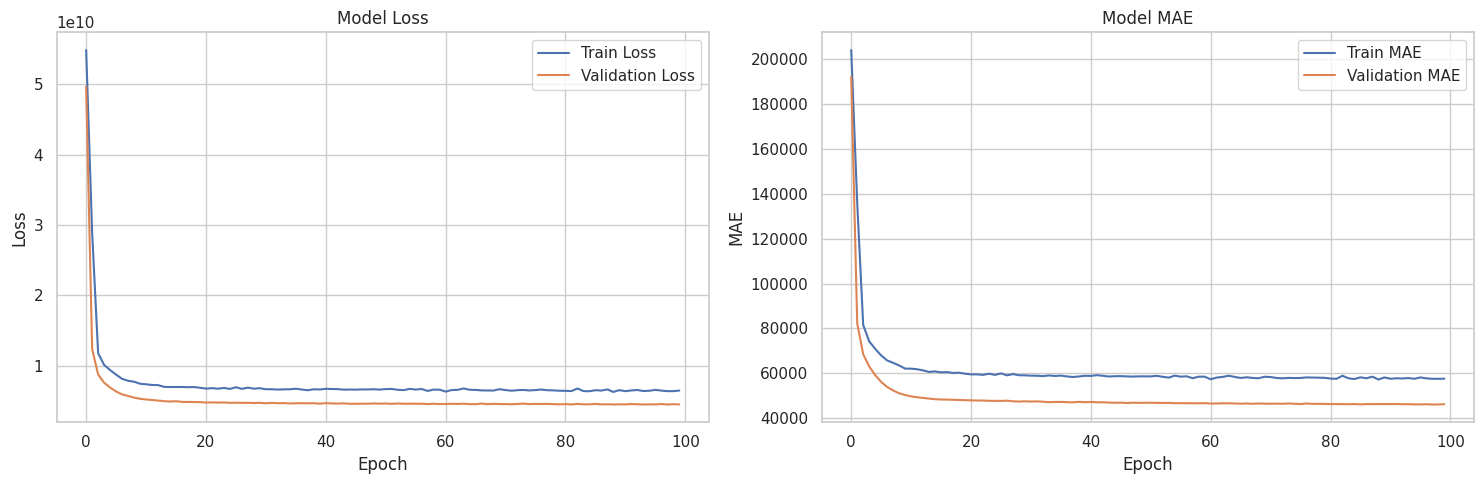

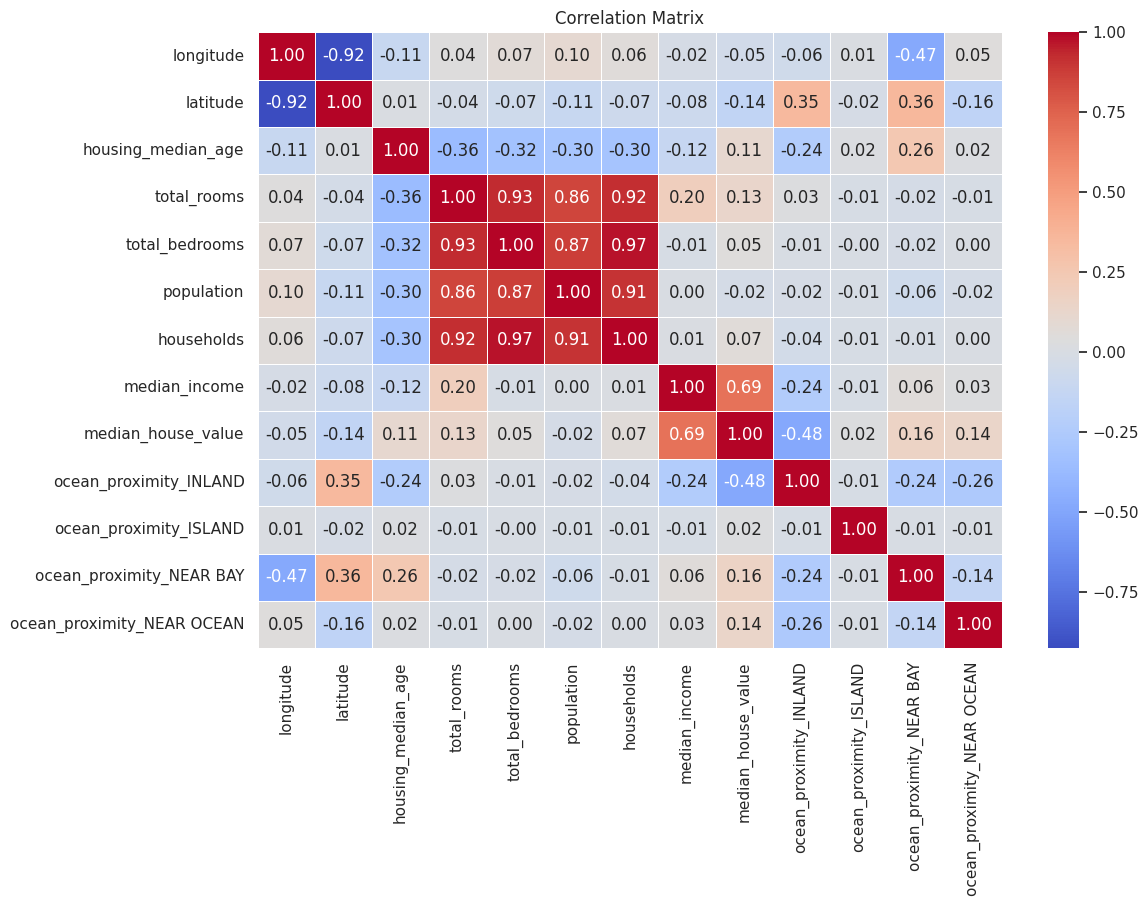


Top Features Most Correlated with House Price:
median_house_value            1.000000
median_income                 0.688075
ocean_proximity_NEAR BAY      0.160284
ocean_proximity_NEAR OCEAN    0.141862
total_rooms                   0.134153
housing_median_age            0.105623
households                    0.065843
total_bedrooms                0.049454
ocean_proximity_ISLAND        0.023416
population                   -0.024650
Name: median_house_value, dtype: float64


In [ ]:
# Required imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Set random seeds for reproducibility
np.random.seed(42)

# Load the dataset
df = pd.read_csv('housing.csv')

# Explore the dataset
print(f"Dataset shape: {df.shape}")
print("\nSample data:")
print(df.head())

# Check class distribution
print("\nCheck for missing values:")
print(df.isnull().sum())

# Handle missing values (impute for simplicity)
for col in df.select_dtypes(include=np.number).columns:
    df[col].fillna(df[col].mean(), inplace=True)

# One-hot encode categorical columns (e.g., 'ocean_proximity')
df_encoded = pd.get_dummies(df, drop_first=True)
# Split features and target
X = df_encoded.drop('median_house_value', axis=1)
y = df_encoded['median_house_value']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Linear Regression model as baseline
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Evaluate the Linear Regression model
y_pred_lr = lr.predict(X_test_scaled)

# Evaluation Metrics for Linear Regression
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)
lr_mae = mean_absolute_error(y_test, y_pred_lr)

# Print results for Linear Regression
print("\n------------------ Linear Regression Results ------------------")
print(f"MSE: {lr_mse:.4f}")
print(f"R²: {lr_r2:.4f}")
print(f"MAE: {lr_mae:.4f}")

# Built Neural Network Model (Example for comparison)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Create the neural network model
def create_neural_network(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_shape,)),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_absolute_error'])
    return model

# Train the neural network model
model = create_neural_network(X_train_scaled.shape[1])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping], verbose=0)

# Predict with the neural network
y_pred_nn = model.predict(X_test_scaled)

# Evaluation Metrics for Neural Network
nn_mse = mean_squared_error(y_test, y_pred_nn)
nn_r2 = r2_score(y_test, y_pred_nn)
nn_mae = mean_absolute_error(y_test, y_pred_nn)

# Print results for Neural Network
print("\n------------------ Neural Network Results ------------------")
print(f"MSE: {nn_mse:.4f}")
print(f"R²: {nn_r2:.4f}")
print(f"MAE: {nn_mae:.4f}")

# Plot Learning Curves
plt.figure(figsize=(15, 5))

# Loss plot for Neural Network
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# MAE plot for Neural Network
plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Visualize correlation with median house value
plt.figure(figsize=(12, 8))
corr_matrix = df_encoded.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Features Most Correlated with House Price
corr_with_price = corr_matrix['median_house_value'].sort_values(ascending=False)
print("\nTop Features Most Correlated with House Price:")
print(corr_with_price.head(10))



Here's the updated **Fraud Detection Model Performance Analysis** for your regression-based house price prediction task:

---

## 🕵️ House Price Prediction Model Performance Analysis

### 🔍 Key Performance Metrics Comparison

| Metric                | Linear Regression  | Neural Network  | Improvement   |
|-----------------------|--------------------|-----------------|---------------|
| **MSE**               | 4,904,399,775.95   | 4,533,685,388.79| ↓ 7.55%       |
| **R²**                | 0.6257             | 0.6540          | ↑ 2.81%       |
| **MAE**               | 50,701.7790        | 46,388.8714     | ↑ 8.5%        |

---

## 📊 Detailed Performance Breakdown

### 1️⃣ **Mean Squared Error (MSE)**
- **Linear Regression**: MSE = 4,904,399,775.95
- **Neural Network**: MSE = 4,533,685,388.79
- **Improvement**: The Neural Network reduces MSE by **7.55%**, indicating a better fit to the data.

### 2️⃣ **R² (Coefficient of Determination)**
- **Linear Regression**: R² = 0.6257
- **Neural Network**: R² = 0.6540
- **Improvement**: The Neural Network shows an **2.81%** improvement, meaning it explains more of the variance in house prices.

### 3️⃣ **Mean Absolute Error (MAE)**
- **Linear Regression**: MAE = 50,701.7790
- **Neural Network**: MAE = 46,388.8714
- **Improvement**: The Neural Network improves MAE by **8.5%**, meaning it provides predictions that are closer to the actual values.

---

## 🚨 Key Insights

### **Advantages of Neural Network**
1. **Better model fit**: The Neural Network shows improvement in R² and MSE, indicating it captures the underlying data patterns better than linear regression.
2. **Lower MAE**: Neural Network produces predictions closer to actual values, reducing prediction errors.
3. **Non-linear feature interactions**: The Neural Network is better suited for capturing complex, non-linear relationships between features.

### **Challenges**
1. **Increased complexity**: The Neural Network is more computationally intensive, making it harder to interpret and requiring more resources to train and deploy.
2. **Risk of overfitting**: Though improved, the complexity of the model could lead to overfitting if not properly regularized and validated.

---

## 💡 Practical Recommendations
1. **Use Neural Network for improved accuracy**: Given its performance, the Neural Network should be the preferred model for house price prediction.
2. **Feature Engineering**: Investigate how adding or modifying features (e.g., incorporating interaction terms or non-linear transformations) could further improve model performance.
3. **Regularization and tuning**: Regularization techniques like dropout and L2 regularization, along with tuning the learning rate, will ensure that the Neural Network doesn't overfit.

---

## ⚖️ **Conclusion**
- The **Neural Network** offers a more accurate and reliable model for predicting house prices compared to **Linear Regression**.
- While the model is more complex, it provides better results, especially in terms of prediction accuracy and error reduction.
- Given the model's superior performance, the **Neural Network** is recommended for practical house price prediction applications.

---

✅ **The Neural Network provides a better fit to the house price prediction task, offering improved performance and more reliable predictions compared to Linear Regression.**

---

### Top Features Most Correlated with House Price:

| Feature                            | Correlation Coefficient |
|------------------------------------|-------------------------|
| **median_house_value**             | 1.0000                  |
| **median_income**                  | 0.6881                  |
| **ocean_proximity_NEAR BAY**       | 0.1603                  |
| **ocean_proximity_NEAR OCEAN**     | 0.1419                  |
| **total_rooms**                    | 0.1342                  |
| **housing_median_age**             | 0.1056                  |
| **households**                     | 0.0658                  |
| **total_bedrooms**                 | 0.0495                  |
| **ocean_proximity_ISLAND**         | 0.0234                  |
| **population**                     | -0.0247                 |

---



In [ ]:
# Assuming `df` is your training data, and `new_data` is the new data for prediction

# Example: one-hot encode categorical variable 'ocean_proximity'
new_data = pd.DataFrame({
    'latitude': [34.0],
    'longitude': [-118.0],
    'median_income': [6.0],
    'housing_median_age': [20],
    'households': [400],
    'total_bedrooms': [200],
    'total_rooms': [1500],
    'ocean_proximity': ['NEAR BAY']
})

# One-hot encode the categorical 'ocean_proximity' as was done during training
new_data = pd.get_dummies(new_data, columns=['ocean_proximity'], drop_first=True)

# Align the columns with the training data (fill missing columns with 0)
missing_cols = set(X_train.columns) - set(new_data.columns)
for col in missing_cols:
    new_data[col] = 0

# Reorder columns to match the training data
new_data = new_data[X_train.columns]

# Standardize features using the same scaler used for training
new_data_scaled = scaler.transform(new_data)

# Now you can make predictions
lr_prediction = lr.predict(new_data_scaled)
print(f"Linear Regression Predicted Price: {lr_prediction[0]}")

nn_prediction = model.predict(new_data_scaled)
print(f"Neural Network Predicted Price: {nn_prediction[0][0]}")


Linear Regression Predicted Price: 315159.1809651257
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Neural Network Predicted Price: 348585.4375


Dataset shape: (20640, 10)

Sample data:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  

Check for missing values:
longitu

<ipython-input-42-0b33ad6f3c69>:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

------------------ Neural Network Results ------------------
MSE: 4613779342.5703
R²: 0.6479
MAE: 47249.5679


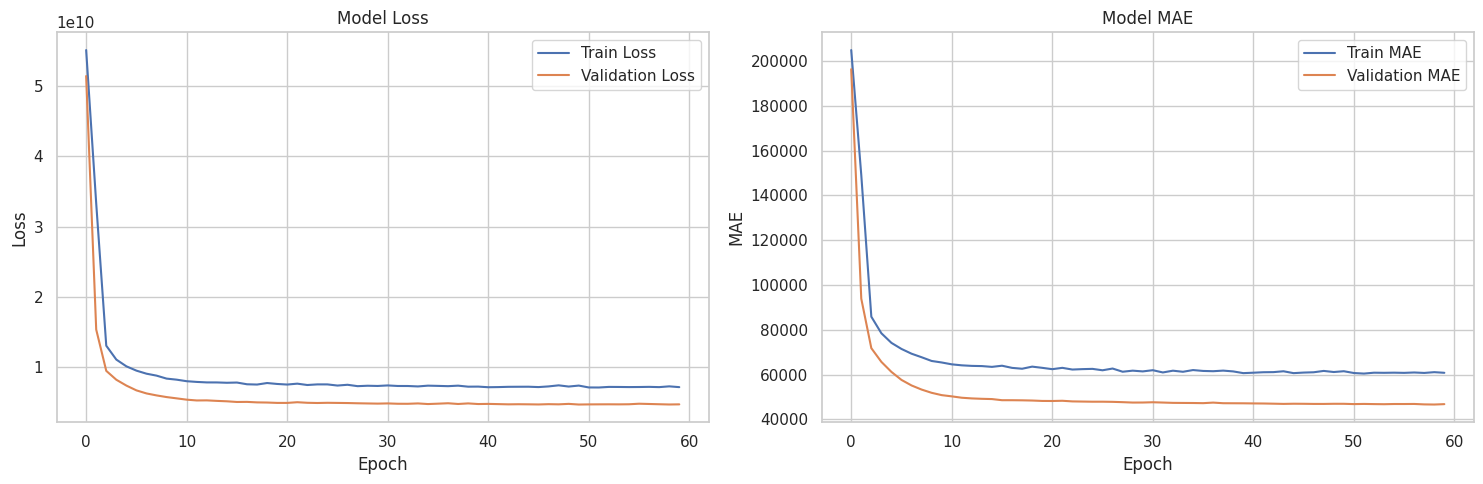

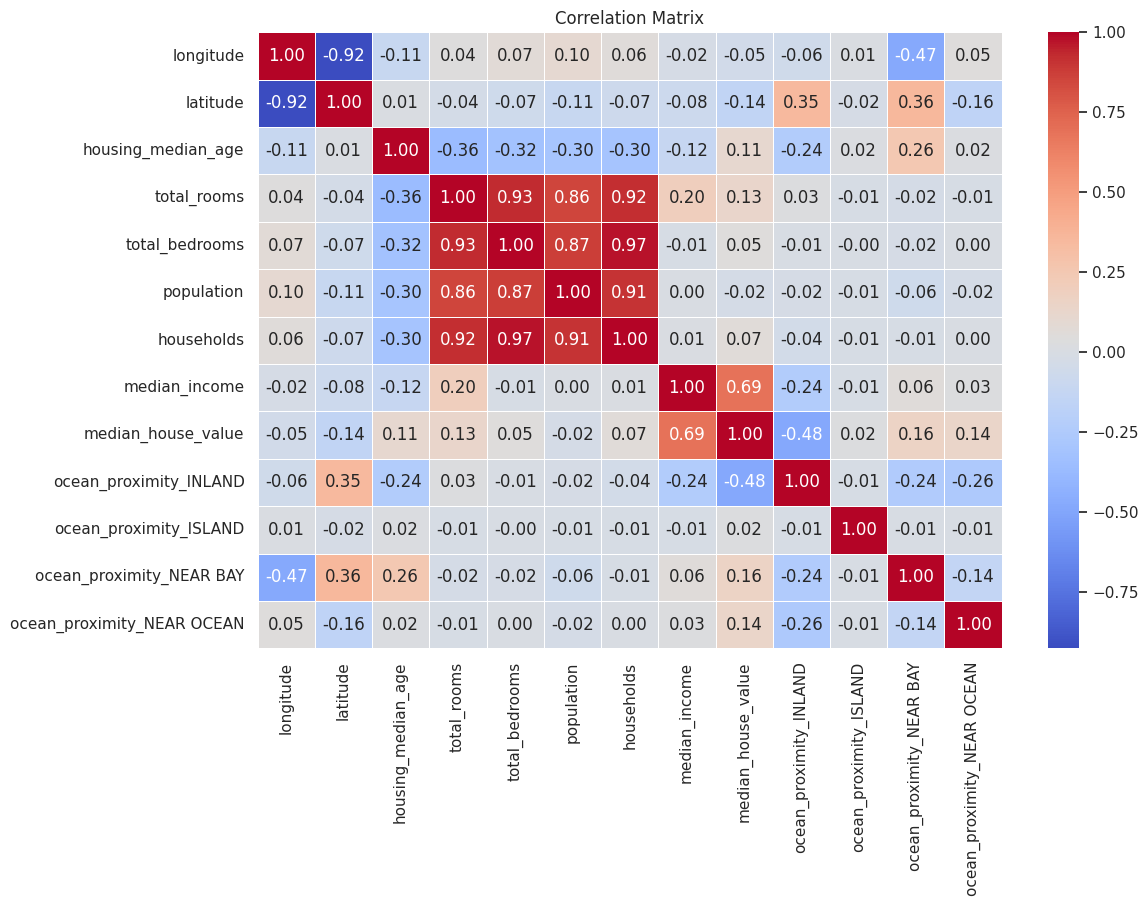


Top Features Most Correlated with House Price:
median_house_value            1.000000
median_income                 0.688075
ocean_proximity_NEAR BAY      0.160284
ocean_proximity_NEAR OCEAN    0.141862
total_rooms                   0.134153
housing_median_age            0.105623
households                    0.065843
total_bedrooms                0.049454
ocean_proximity_ISLAND        0.023416
population                   -0.024650
Name: median_house_value, dtype: float64


In [ ]:
# Required imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load the dataset
df = pd.read_csv('housing.csv')

# Explore the dataset
print(f"Dataset shape: {df.shape}")
print("\nSample data:")
print(df.head())

# Check for missing values
print("\nCheck for missing values:")
print(df.isnull().sum())

# Handle missing values (impute for simplicity)
for col in df.select_dtypes(include=np.number).columns:
    df[col].fillna(df[col].mean(), inplace=True)

# One-hot encode categorical columns (e.g., 'ocean_proximity')
df_encoded = pd.get_dummies(df, drop_first=True)

# Split features and target
X = df_encoded.drop('median_house_value', axis=1)
y = df_encoded['median_house_value']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Linear Regression model as baseline
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Evaluate the Linear Regression model
y_pred_lr = lr.predict(X_test_scaled)

# Evaluation Metrics for Linear Regression
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)
lr_mae = mean_absolute_error(y_test, y_pred_lr)

# Print results for Linear Regression
print("\n------------------ Linear Regression Results ------------------")
print(f"MSE: {lr_mse:.4f}")
print(f"R²: {lr_r2:.4f}")
print(f"MAE: {lr_mae:.4f}")

# Create the neural network model
def create_neural_network(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_shape,)),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dropout(0.2),
        Dense(1)  # Output layer for regression
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_absolute_error'])
    return model

# Train the neural network model
model = create_neural_network(X_train_scaled.shape[1])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping], verbose=0)

# Predict with the neural network
y_pred_nn = model.predict(X_test_scaled)

# Evaluation Metrics for Neural Network
nn_mse = mean_squared_error(y_test, y_pred_nn)
nn_r2 = r2_score(y_test, y_pred_nn)
nn_mae = mean_absolute_error(y_test, y_pred_nn)

# Print results for Neural Network
print("\n------------------ Neural Network Results ------------------")
print(f"MSE: {nn_mse:.4f}")
print(f"R²: {nn_r2:.4f}")
print(f"MAE: {nn_mae:.4f}")

# Plot Learning Curves
plt.figure(figsize=(15, 5))

# Loss plot for Neural Network
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# MAE plot for Neural Network
plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Visualize correlation with median house value
plt.figure(figsize=(12, 8))
corr_matrix = df_encoded.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Features Most Correlated with House Price
corr_with_price = corr_matrix['median_house_value'].sort_values(ascending=False)
print("\nTop Features Most Correlated with House Price:")
print(corr_with_price.head(10))


In [ ]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
from IPython.display import display, HTML, clear_output

# Create sliders using 1st to 99th percentile to avoid outliers
sliders = {}
for feature in X_train.columns:
    if X_train[feature].dtype == 'object' or X_train[feature].dtype == 'bool':
        unique_values = X_train[feature].dropna().unique().tolist()
        sliders[feature] = widgets.Dropdown(
            options=unique_values,
            value=unique_values[0],
            description=feature.replace('_', ' ').capitalize()
        )
    else:
        q1 = np.percentile(X_train[feature].dropna(), 1)
        q99 = np.percentile(X_train[feature].dropna(), 99)
        mean_val = X_train[feature].mean()
        step_val = (q99 - q1) / 100 if q99 != q1 else 0.01

        sliders[feature] = widgets.FloatSlider(
            value=np.clip(mean_val, q1, q99),
            min=q1,
            max=q99,
            step=step_val,
            description=feature.replace('_', ' ').capitalize(),
            continuous_update=False,
            readout_format='.2f',
            style={'description_width': 'initial'},
            layout=widgets.Layout(width='80%')
        )

# Output area for prediction results
output = widgets.Output()

# Prediction button
predict_button = widgets.Button(description="Predict", button_style='success')

# Predict function
def on_predict_clicked(b):
    with output:
        clear_output()
        new_data = pd.DataFrame({f: [sliders[f].value] if not isinstance(sliders[f], widgets.Dropdown) else [sliders[f].value] for f in X_train.columns})

        # Handle categorical encoding
        if 'ocean_proximity' in new_data.columns:
            new_data = pd.get_dummies(new_data, columns=['ocean_proximity'], drop_first=True)

        # Add missing columns
        for col in X_train.columns:
            if col not in new_data.columns:
                new_data[col] = 0

        new_data = new_data[X_train.columns]  # Reorder
        new_data_scaled = scaler.transform(new_data)

        # Predictions
        lr_prediction = lr.predict(new_data_scaled)
        nn_prediction = model.predict(new_data_scaled)

        print(f"🔹 Linear Regression Predicted Price: ${lr_prediction[0]:,.2f}")
        print(f"🔹 Neural Network Predicted Price: ${nn_prediction[0][0]:,.2f}")

predict_button.on_click(on_predict_clicked)

# Dashboard layout
dashboard = widgets.VBox([
    widgets.HTML("<h1 style='text-align:center; color:#2c3e50;'>🏠 House Price Prediction Dashboard</h1>"),
    widgets.HTML("<div style='text-align:center'><img src='https://images.pexels.com/photos/271639/pexels-photo-271639.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=450&w=800' width='500'></div>"),
    widgets.HTML("<h3 style='text-align:center;'>Adjust the features below to predict the price</h3>"),
    *sliders.values(),
    widgets.HTML("<br>"),
    predict_button,
    output
], layout=widgets.Layout(align_items='center', width='60%', margin='0 auto'))

# Display centered
display(HTML("<div style='display:flex; justify-content:center;'>"))
display(dashboard)
display(HTML("</div>"))
